# Análise Exploratória e Processamento de Dados

À medida que eu fui desenvolvendo o estudo, percebi que para mim faz mais sentido realizar a análise, obter um insight e realizar o seu processamento em seguida. Portanto, a análise exploratória e o processamento de dados estão sendo desenvolvidos em conjunto.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Contato inicial com o dataset

A ideia é apenas obter uma visão rápida e geral dos dados presentes no dataset e que tipo de correções/transformações eu posso aplicar.

In [12]:
df = pd.read_csv('./data/cars.csv')

In [13]:
df

manufacturer            model  year   mileage  \
0             Acura  ILX Hybrid 1.5L  2013   92945.0   
1             Acura  ILX Hybrid 1.5L  2013   47645.0   
2             Acura  ILX Hybrid 1.5L  2013   53422.0   
3             Acura  ILX Hybrid 1.5L  2013  117598.0   
4             Acura  ILX Hybrid 1.5L  2013  114865.0   
...             ...              ...   ...       ...   
762086        Volvo  S60 B5 Momentum  2022   22877.0   
762087        Volvo           S60 T5  2012   72900.0   
762088        Volvo           S60 T5  2014   92000.0   
762089        Volvo  S60 T5 Platinum  2013  132000.0   
762090        Volvo   S60 T5 Premier  2015  115592.0   

                                                   engine       transmission  \
0       1.5L I-4 i-VTEC variable valve control, engine...          Automatic   
1                             1.5L I4 8V MPFI SOHC Hybrid      Automatic CVT   
2                             1.5L I4 8V MPFI SOHC Hybrid      Automatic CVT   
3                             1.5L I4 8V MPFI SOHC Hybrid      Automatic CVT   
4                             1.5L I4 8V MPFI SOHC Hybrid      Automatic CVT   
...                                                   ...                ...   
762086                         2.0L I4 16V GDI DOHC Turbo  8-Speed Automatic   
762087       250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel                A/T   
762088                        2.5L I5 20V MPFI DOHC Turbo  6-Speed Automatic   
762089                        2.5L I5 20V MPFI DOHC Turbo  6-Speed Automatic   
762090                        2.5L I5 20V MPFI DOHC Turbo  6-Speed Automatic   

               drivetrain fuel_type    mpg           exterior_color  \
0       Front-wheel Drive  Gasoline  39-38                    Black   
1       Front-wheel Drive    Hybrid  39-38                     Gray   
2       Front-wheel Drive    Hybrid  39-38    Bellanova White Pearl   
3       Front-wheel Drive    Hybrid  39-38  Polished Metal Metallic   
4       Front-wheel Drive    Hybrid  39-38                      NaN   
...                   ...       ...    ...                      ...   
762086    All-wheel Drive  Gasoline  25-33   Bright Silver Metallic   
762087  Front-wheel Drive  Gasoline    NaN                      Red   
762088  Front-wheel Drive  Gasoline  21-30                Ice White   
762089    All-wheel Drive  Gasoline  20-29                Ice White   
762090    All-wheel Drive  Gasoline  20-29     Savile Gray Metallic   

       interior_color  accidents_or_damage  one_owner  personal_use_only  \
0           Parchment                  0.0        0.0                0.0   
1               Ebony                  1.0        1.0                1.0   
2               Ebony                  0.0        1.0                1.0   
3                 NaN                  0.0        1.0                1.0   
4               Ebony                  1.0        0.0                1.0   
...               ...                  ...        ...                ...   
762086          Blond                  0.0        1.0                0.0   
762087          Beige                  NaN        NaN                NaN   
762088     Soft Beige                  0.0        0.0                1.0   
762089      Off Black                  1.0        0.0                0.0   
762090      Off-Black                  1.0        0.0                1.0   

                         seller_name  seller_rating  driver_rating  \
0                       Iconic Coach            NaN            4.4   
1                         Kars Today            NaN            4.4   
2       Weiss Toyota of South County            4.3            4.4   
3                   Apple Tree Acura            NaN            4.4   
4            Herb Connolly Chevrolet            3.7            4.4   
...                              ...            ...            ...   
762086            Volvo Cars Danbury            4.2            4.2   
762087                           NaN           

In [14]:
df.shape

(762091, 20)

In [15]:
df.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [16]:
df.isnull().sum()

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15050
transmission             9904
drivetrain              21562
fuel_type               22927
mpg                    142071
exterior_color           8859
interior_color          56975
accidents_or_damage     24212
one_owner               31483
personal_use_only       24852
seller_name              8593
seller_rating          213973
driver_rating           31632
driver_reviews_num          0
price_drop             351979
price                       0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(9145)

Valores muito **discrepantes** de máximo e mínimo para price

In [18]:
df['price'].min()

np.float64(1.0)

In [19]:
df['price'].max()

np.float64(1000000000.0)

## Gerando a amostra aleatória

Geração de uma **amostra repordutível simples** e realizando o tratamento das suas duplicatas

Garantindo que a amostra seja **reprodutível** rodando a célula abaixo

In [20]:
np.random.seed(33)

Eu escolhi gerar uma **amostra aleatória simples** de 25% do dataset

In [21]:
sample = df.sample(frac=0.25)
sample

manufacturer                model  year  mileage  \
191809           Ford              Focus S  2018  94746.0   
488330        Lincoln             MKZ Base  2014  55710.0   
713389         Toyota  RAV4 Hybrid Limited  2022  15022.0   
531766  Mercedes-Benz  C-Class C300 4MATIC  2014  78600.0   
216502           Ford       F-250 Platinum  2017  70365.0   
...               ...                  ...   ...      ...   
489863        Lincoln     Corsair Standard  2021  22369.0   
513217  Mercedes-Benz  GLC 300 Base 4MATIC  2020  51915.0   
59014             BMW                   X3  2021  41279.0   
314423          Honda              HR-V LX  2021  16722.0   
42849             BMW                230 i  2020  28559.0   

                                    engine  \
191809  2.0L I4 16V GDI DOHC Flexible Fuel   
488330          2.0L I4 16V GDI DOHC Turbo   
713389                                2.5L   
531766      Premium Unleaded V-6 3.5 L/213   
216502    6.7L V8 32V DDI OHV Turbo Diesel   
...                                    ...   
489863          2.0L I4 16V GDI DOHC Turbo   
513217          2.0L I4 16V GDI DOHC Turbo   
59014                                  NaN   
314423               1.8L I4 16V MPFI SOHC   
42849           2.0L I4 16V GDI DOHC Turbo   

                              transmission         drivetrain      fuel_type  \
191809   6-Speed Automatic with Auto-Shift  Front-wheel Drive  E85 Flex Fuel   
488330                   6-Speed Automatic  Front-wheel Drive       Gasoline   
713389  Continuously Variable Transmission                NaN              B   
531766                           Automatic    All-wheel Drive       Gasoline   
216502                   6-Speed Automatic   Four-wheel Drive         Diesel   
...                                    ...                ...            ...   
489863                   8-Speed Automatic    All-wheel Drive       Gasoline   
513217                   9-Speed Automatic    All-wheel Drive       Gasoline   
59014                            AUTOMATIC                NaN            NaN   
314423                       Automatic CVT    All-wheel Drive       Gasoline   
42849                    8-Speed Automatic   Rear-wheel Drive       Gasoline   

          mpg                    exterior_color  interior_color  \
191809  25-34                      Shadow Black  Charcoal Black   
488330  22-33  White Platinum Tri-Coat Metallic  Charcoal Black   
713389    NaN               SILVER SKY METALLIC            EA20   
531766  20-27                             Black           Black   
216502    NaN                 Magnetic Metallic           Black   
...       ...                               ...             ...   
489863  21-29                   Burgundy Velvet       Sandstone   
513217  21-28                       Polar White           Black   
59014     NaN           Glacier Silver Metallic             NaN   
314423  27-31                            Silver            Gray   
42849   24-32                         Jet Black  Oyster / Black   

        accidents_or_damage  one_owner  personal_use_only  \
191809                  0.0        1.0                1.0   
488330                  0.0        0.0                1.0   
713389                  0.0        1.0                1.0   
531766                  0.0        0.0                0.0   
216502                  0.0        1.0                1.0   
...                     ...        ...                ...   
489863                  0.0        1.0                0.0   
513217                  0.0        1.0                1.0   
59014                   0.0        0.0                0.0   
314423                  1.0        1.0                1.0   
42849                   0.0        1.0                0.0   

                           seller_name  seller_rating  driver_rating  \
191809          Blasius Pre-Owned Auto            4.3            4.6   
488330                   Maxkar Motors            3.8            4.7   
713389  

In [22]:
sample.nunique()

manufacturer              30
model                   7992
year                      93
mileage                99257
engine                  3903
transmission             684
drivetrain                25
fuel_type                 23
mpg                      635
exterior_color          4675
interior_color          2663
accidents_or_damage        2
one_owner                  2
personal_use_only          2
seller_name            16936
seller_rating             41
driver_rating             30
driver_reviews_num       369
price_drop              4508
price                  36393
dtype: int64

In [23]:
sample.duplicated().sum()

np.int64(553)

Removendo as **duplicatas** da amostra

In [24]:
sample = sample.drop_duplicates()

## Tratando valores nulos das variáveis

Tratei os valores nulos do dataframe de forma que as variáveis **categóricas** fossem substituídas pela string **'Not Informed'** e as variáveis **númericas** pela **Moda** ou **Mediana**

In [25]:
sample.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [26]:
sample.isnull().sum()

manufacturer               0
model                      0
year                       0
mileage                  129
engine                  3699
transmission            2428
drivetrain              5365
fuel_type               5708
mpg                    35549
exterior_color          2224
interior_color         14182
accidents_or_damage     6098
one_owner               7941
personal_use_only       6275
seller_name             2188
seller_rating          53368
driver_rating           8014
driver_reviews_num         0
price_drop             87577
price                      0
dtype: int64

### Variáveis categóricas

In [27]:
object_sample_vars = sample[['engine', 'transmission', 'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color', 'seller_name']]
object_sample_vars

engine  \
191809  2.0L I4 16V GDI DOHC Flexible Fuel   
488330          2.0L I4 16V GDI DOHC Turbo   
713389                                2.5L   
531766      Premium Unleaded V-6 3.5 L/213   
216502    6.7L V8 32V DDI OHV Turbo Diesel   
...                                    ...   
489863          2.0L I4 16V GDI DOHC Turbo   
513217          2.0L I4 16V GDI DOHC Turbo   
59014                                  NaN   
314423               1.8L I4 16V MPFI SOHC   
42849           2.0L I4 16V GDI DOHC Turbo   

                              transmission         drivetrain      fuel_type  \
191809   6-Speed Automatic with Auto-Shift  Front-wheel Drive  E85 Flex Fuel   
488330                   6-Speed Automatic  Front-wheel Drive       Gasoline   
713389  Continuously Variable Transmission                NaN              B   
531766                           Automatic    All-wheel Drive       Gasoline   
216502                   6-Speed Automatic   Four-wheel Drive         Diesel   
...                                    ...                ...            ...   
489863                   8-Speed Automatic    All-wheel Drive       Gasoline   
513217                   9-Speed Automatic    All-wheel Drive       Gasoline   
59014                            AUTOMATIC                NaN            NaN   
314423                       Automatic CVT    All-wheel Drive       Gasoline   
42849                    8-Speed Automatic   Rear-wheel Drive       Gasoline   

          mpg                    exterior_color  interior_color  \
191809  25-34                      Shadow Black  Charcoal Black   
488330  22-33  White Platinum Tri-Coat Metallic  Charcoal Black   
713389    NaN               SILVER SKY METALLIC            EA20   
531766  20-27                             Black           Black   
216502    NaN                 Magnetic Metallic           Black   
...       ...                               ...             ...   
489863  21-29                   Burgundy Velvet       Sandstone   
513217  21-28                       Polar White           Black   
59014     NaN           Glacier Silver Metallic             NaN   
314423  27-31                            Silver            Gray   
42849   24-32                         Jet Black  Oyster / Black   

                           seller_name  
191809          Blasius Pre-Owned Auto  
488330                   Maxkar Motors  
713389                Charlie's Toyota  
531766       Mercedes-Benz of Lynnwood  
216502          Grapevine Ford Lincoln  
...                                ...  
489863                       Zeck Ford  
513217     Mercedes-Benz of Massapequa  
59014          BMW of Cincinnati North  
314423  West Herr Honda of Canandaigua  
42849           AutoLenders Toms River  

[189970 rows x 8 columns]

Preenchendo valores faltantes das colunas categóricas com **'Not Informed'**

In [28]:
sample = sample.copy()

for col_name in object_sample_vars:
    sample.loc[:, col_name] = sample[col_name].fillna('Not Informed')

### Variáveis numéricas

Com base em **características das variáveis**, separei algumas para serem preenchidas pela **moda** e outras pela **mediana**

'accidents_or_damage', 'one_owner' e 'personal_use_only' foram substituídas pela **moda** por possuírem apenas valores 0 e 1.<br>
'mileage','seller_rating', 'driver_rating' e 'price_drop' foram substituídas pela **mediana** por possuírem valores diversos.

In [29]:
mode_numeric_sample_vars = sample[['accidents_or_damage', 'one_owner', 'personal_use_only']]
median_numeric_sample_vars = sample[['mileage','seller_rating', 'driver_rating', 'price_drop']]

In [30]:
mode_numeric_sample_vars

accidents_or_damage  one_owner  personal_use_only
191809                  0.0        1.0                1.0
488330                  0.0        0.0                1.0
713389                  0.0        1.0                1.0
531766                  0.0        0.0                0.0
216502                  0.0        1.0                1.0
...                     ...        ...                ...
489863                  0.0        1.0                0.0
513217                  0.0        1.0                1.0
59014                   0.0        0.0                0.0
314423                  1.0        1.0                1.0
42849                   0.0        1.0                0.0

[189970 rows x 3 columns]

In [31]:
median_numeric_sample_vars

mileage  seller_rating  driver_rating  price_drop
191809  94746.0            4.3            4.6       590.0
488330  55710.0            3.8            4.7       500.0
713389  15022.0            NaN            4.8         NaN
531766  78600.0            4.4            4.7       505.0
216502  70365.0            4.6            4.6         NaN
...         ...            ...            ...         ...
489863  22369.0            4.9            4.8       500.0
513217  51915.0            4.8            4.8         NaN
59014   41279.0            NaN            4.7         NaN
314423  16722.0            4.5            4.7       253.0
42849   28559.0            4.7            4.9       382.0

[189970 rows x 4 columns]

Preenchendo valores faltantes de colunas numéricas com a **moda**

In [32]:
for col_name in mode_numeric_sample_vars:
    mode = sample[col_name].mode()[0]
    sample.loc[:, col_name] = sample[col_name].fillna(mode)

Preenchendo valores faltantes de colunas numéricas com a **mediana**

In [33]:
for col_name in median_numeric_sample_vars:
    median = sample[col_name].median()
    sample.loc[:, col_name] = sample[col_name].fillna(median)

Tratamento de registros nulos concluído na sample

In [34]:
sample.isnull().sum()

manufacturer           0
model                  0
year                   0
mileage                0
engine                 0
transmission           0
drivetrain             0
fuel_type              0
mpg                    0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
seller_name            0
seller_rating          0
driver_rating          0
driver_reviews_num     0
price_drop             0
price                  0
dtype: int64

In [35]:
sample

manufacturer                model  year  mileage  \
191809           Ford              Focus S  2018  94746.0   
488330        Lincoln             MKZ Base  2014  55710.0   
713389         Toyota  RAV4 Hybrid Limited  2022  15022.0   
531766  Mercedes-Benz  C-Class C300 4MATIC  2014  78600.0   
216502           Ford       F-250 Platinum  2017  70365.0   
...               ...                  ...   ...      ...   
489863        Lincoln     Corsair Standard  2021  22369.0   
513217  Mercedes-Benz  GLC 300 Base 4MATIC  2020  51915.0   
59014             BMW                   X3  2021  41279.0   
314423          Honda              HR-V LX  2021  16722.0   
42849             BMW                230 i  2020  28559.0   

                                    engine  \
191809  2.0L I4 16V GDI DOHC Flexible Fuel   
488330          2.0L I4 16V GDI DOHC Turbo   
713389                                2.5L   
531766      Premium Unleaded V-6 3.5 L/213   
216502    6.7L V8 32V DDI OHV Turbo Diesel   
...                                    ...   
489863          2.0L I4 16V GDI DOHC Turbo   
513217          2.0L I4 16V GDI DOHC Turbo   
59014                         Not Informed   
314423               1.8L I4 16V MPFI SOHC   
42849           2.0L I4 16V GDI DOHC Turbo   

                              transmission         drivetrain      fuel_type  \
191809   6-Speed Automatic with Auto-Shift  Front-wheel Drive  E85 Flex Fuel   
488330                   6-Speed Automatic  Front-wheel Drive       Gasoline   
713389  Continuously Variable Transmission       Not Informed              B   
531766                           Automatic    All-wheel Drive       Gasoline   
216502                   6-Speed Automatic   Four-wheel Drive         Diesel   
...                                    ...                ...            ...   
489863                   8-Speed Automatic    All-wheel Drive       Gasoline   
513217                   9-Speed Automatic    All-wheel Drive       Gasoline   
59014                            AUTOMATIC       Not Informed   Not Informed   
314423                       Automatic CVT    All-wheel Drive       Gasoline   
42849                    8-Speed Automatic   Rear-wheel Drive       Gasoline   

                 mpg                    exterior_color  interior_color  \
191809         25-34                      Shadow Black  Charcoal Black   
488330         22-33  White Platinum Tri-Coat Metallic  Charcoal Black   
713389  Not Informed               SILVER SKY METALLIC            EA20   
531766         20-27                             Black           Black   
216502  Not Informed                 Magnetic Metallic           Black   
...              ...                               ...             ...   
489863         21-29                   Burgundy Velvet       Sandstone   
513217         21-28                       Polar White           Black   
59014   Not Informed           Glacier Silver Metallic    Not Informed   
314423         27-31                            Silver            Gray   
42849          24-32                         Jet Black  Oyster / Black   

        accidents_or_damage  one_owner  personal_use_only  \
191809                  0.0        1.0                1.0   
488330                  0.0        0.0                1.0   
713389                  0.0        1.0                1.0   
531766                  0.0        0.0                0.0   
216502                  0.0        1.0                1.0   
...                     ...        ...                ...   
489863                  0.0        1.0                0.0   
513217                  0.0        1.0                1.0   
59014                   0.0        0.0                0.0   
314423                  1.0        1.0                1.0   
42849                   0.0        1.0                0.0   

                           seller_name  seller_rating  driver_rating  \
191809          Blasius Pre-Owned Auto            4.3            4.6

## Análise de variáveis

### Quais variáveis são numéricas?

Definição das variáveis numéricas da sample

Em primeira mão, é possível visualizar que as variáveis numéricas são aquelas são do tipo **int64** ou **float64**

In [36]:
numerical_columns = sample.select_dtypes(include='number').dtypes
print('Variáveis numéricas:')
print(numerical_columns)

Variáveis numéricas:
year                     int64
mileage                float64
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object


In [37]:
sample.head()

manufacturer                model  year  mileage  \
191809           Ford              Focus S  2018  94746.0   
488330        Lincoln             MKZ Base  2014  55710.0   
713389         Toyota  RAV4 Hybrid Limited  2022  15022.0   
531766  Mercedes-Benz  C-Class C300 4MATIC  2014  78600.0   
216502           Ford       F-250 Platinum  2017  70365.0   

                                    engine  \
191809  2.0L I4 16V GDI DOHC Flexible Fuel   
488330          2.0L I4 16V GDI DOHC Turbo   
713389                                2.5L   
531766      Premium Unleaded V-6 3.5 L/213   
216502    6.7L V8 32V DDI OHV Turbo Diesel   

                              transmission         drivetrain      fuel_type  \
191809   6-Speed Automatic with Auto-Shift  Front-wheel Drive  E85 Flex Fuel   
488330                   6-Speed Automatic  Front-wheel Drive       Gasoline   
713389  Continuously Variable Transmission       Not Informed              B   
531766                           Automatic    All-wheel Drive       Gasoline   
216502                   6-Speed Automatic   Four-wheel Drive         Diesel   

                 mpg                    exterior_color  interior_color  \
191809         25-34                      Shadow Black  Charcoal Black   
488330         22-33  White Platinum Tri-Coat Metallic  Charcoal Black   
713389  Not Informed               SILVER SKY METALLIC            EA20   
531766         20-27                             Black           Black   
216502  Not Informed                 Magnetic Metallic           Black   

        accidents_or_damage  one_owner  personal_use_only  \
191809                  0.0        1.0                1.0   
488330                  0.0        0.0                1.0   
713389                  0.0        1.0                1.0   
531766                  0.0        0.0                0.0   
216502                  0.0        1.0                1.0   

                      seller_name  seller_rating  driver_rating  \
191809     Blasius Pre-Owned Auto            4.3            4.6   
488330              Maxkar Motors            3.8            4.7   
713389           Charlie's Toyota            4.5            4.8   
531766  Mercedes-Benz of Lynnwood            4.4            4.7   
216502     Grapevine Ford Lincoln            4.6            4.6   

        driver_reviews_num  price_drop    price  
191809               202.0       590.0  10994.0  
488330                69.0       500.0  17498.0  
713389                13.0       644.0  42995.0  
531766               100.0       505.0  17995.0  
216502               163.0       644.0  63999.0

Porém, analisando o dataframe, é possível ver que a variável **mpg** que representa as milhas por galão de cada carro, é uma **variável categórica** que pode ser transformada para uma **variável numérica**. Isso vai auxiliar nosso futuro trabalho de separação de dados de treino/teste e treinamento do modelo.

In [38]:
sample['mpg'].value_counts()

mpg
Not Informed    35549
19-26            4019
18-25            3924
17-25            3567
20-27            3287
                ...  
13-0.0              1
26-36.0             1
126-111             1
28-29               1
14-18.0             1
Name: count, Length: 636, dtype: int64

Nesse primeiro passo, primeiramente eu preciso voltar atrás e desfazer o tratamento de valor nulo para a coluna mpg, transformando-a novamente em **NaN**.

In [39]:
sample.loc[:, 'mpg'] = sample['mpg'].replace('Not Informed', np.nan)
sample

manufacturer                model  year  mileage  \
191809           Ford              Focus S  2018  94746.0   
488330        Lincoln             MKZ Base  2014  55710.0   
713389         Toyota  RAV4 Hybrid Limited  2022  15022.0   
531766  Mercedes-Benz  C-Class C300 4MATIC  2014  78600.0   
216502           Ford       F-250 Platinum  2017  70365.0   
...               ...                  ...   ...      ...   
489863        Lincoln     Corsair Standard  2021  22369.0   
513217  Mercedes-Benz  GLC 300 Base 4MATIC  2020  51915.0   
59014             BMW                   X3  2021  41279.0   
314423          Honda              HR-V LX  2021  16722.0   
42849             BMW                230 i  2020  28559.0   

                                    engine  \
191809  2.0L I4 16V GDI DOHC Flexible Fuel   
488330          2.0L I4 16V GDI DOHC Turbo   
713389                                2.5L   
531766      Premium Unleaded V-6 3.5 L/213   
216502    6.7L V8 32V DDI OHV Turbo Diesel   
...                                    ...   
489863          2.0L I4 16V GDI DOHC Turbo   
513217          2.0L I4 16V GDI DOHC Turbo   
59014                         Not Informed   
314423               1.8L I4 16V MPFI SOHC   
42849           2.0L I4 16V GDI DOHC Turbo   

                              transmission         drivetrain      fuel_type  \
191809   6-Speed Automatic with Auto-Shift  Front-wheel Drive  E85 Flex Fuel   
488330                   6-Speed Automatic  Front-wheel Drive       Gasoline   
713389  Continuously Variable Transmission       Not Informed              B   
531766                           Automatic    All-wheel Drive       Gasoline   
216502                   6-Speed Automatic   Four-wheel Drive         Diesel   
...                                    ...                ...            ...   
489863                   8-Speed Automatic    All-wheel Drive       Gasoline   
513217                   9-Speed Automatic    All-wheel Drive       Gasoline   
59014                            AUTOMATIC       Not Informed   Not Informed   
314423                       Automatic CVT    All-wheel Drive       Gasoline   
42849                    8-Speed Automatic   Rear-wheel Drive       Gasoline   

          mpg                    exterior_color  interior_color  \
191809  25-34                      Shadow Black  Charcoal Black   
488330  22-33  White Platinum Tri-Coat Metallic  Charcoal Black   
713389    NaN               SILVER SKY METALLIC            EA20   
531766  20-27                             Black           Black   
216502    NaN                 Magnetic Metallic           Black   
...       ...                               ...             ...   
489863  21-29                   Burgundy Velvet       Sandstone   
513217  21-28                       Polar White           Black   
59014     NaN           Glacier Silver Metallic    Not Informed   
314423  27-31                            Silver            Gray   
42849   24-32                         Jet Black  Oyster / Black   

        accidents_or_damage  one_owner  personal_use_only  \
191809                  0.0        1.0                1.0   
488330                  0.0        0.0                1.0   
713389                  0.0        1.0                1.0   
531766                  0.0        0.0                0.0   
216502                  0.0        1.0                1.0   
...                     ...        ...                ...   
489863                  0.0        1.0                0.0   
513217                  0.0        1.0                1.0   
59014                   0.0        0.0                0.0   
314423                  1.0        1.0                1.0   
42849                   0.0        1.0                0.0   

                           seller_name  seller_rating  driver_rating  \
191809          Blasius Pre-Owned Auto            4.3            4.6   
488330                   Maxkar Motors            3.8            4.7   
713389  

Para transformar o mpg, a função abaixo **seleciona os valores que são intervalos**, ou seja, foram separados por **'-'**, transforma-os para **float** e calcula a **média** entre eles.<br>

Para valores **únicos**, sem intervalos, ele só realiza a **transformação para float**.

In [40]:
def transform_mpg(value):
    if isinstance(value, str) and '-' in value:  
        v = value.split('-')
        return (float(v[0]) + float(v[1])) / 2 
    elif isinstance(value, str):  
        return float(value)
    return value  

In [41]:
# a função apply é interessante pois aplica a função transform_mpg para cada linha da coluna 'mpg'
sample['mpg'] = sample['mpg'].apply(transform_mpg) 

In [42]:
sample['mpg'].isnull().sum()

np.int64(35549)

#### Tratando os valores nulos

Como a variável 'mpg' agora é numérica, é necessário substituir os seus valores nulos.<br>
Como boa prática, irei calcular a **mediana** da coluna e utilizá-la para substituir os valores nulos

In [43]:
median_mpg = sample['mpg'].median()
print("Mediana 'mpg': ", median_mpg)

Mediana 'mpg':  24.0


In [44]:
sample['mpg'] = sample['mpg'].fillna(median_mpg)

In [45]:
sample['mpg'].isnull().sum()

np.int64(0)

In [46]:
numerical_vars = sample[['price', 'price_drop', 'year', 'mileage', 'mpg', 'personal_use_only', 'accidents_or_damage', 'one_owner', 'seller_rating', 'driver_rating', 'driver_reviews_num']]

### Correlação de Pearson

Variáveis numéricas

In [47]:
numerical_corr = numerical_vars.corr(method='pearson')

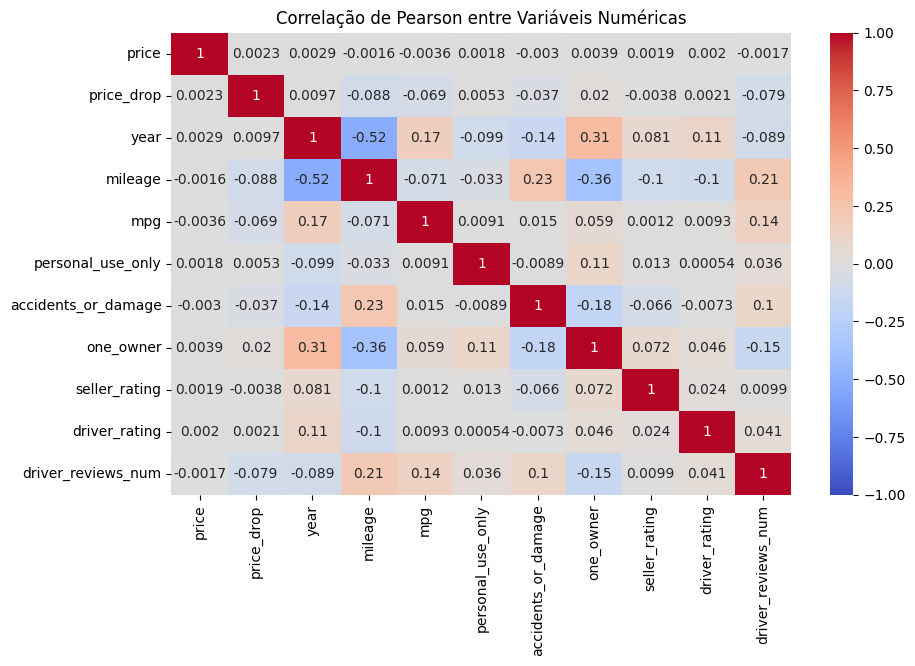

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1);
plt.title("Correlação de Pearson entre Variáveis Numéricas")
plt.show()

O heatmap evidencia que existem correlações **positivas** que estão classificadas em **muito fracas** e **fracas**<br>
As correlações **negativas** se encontram em **fracas** e **moderadas**<br>

As correlações entre as variáveis podem estar tão baixas pois o **tratamento dos dados ainda não foi realizado**. Portanto, após o processamento, esse gráfico será plotado novamente para visualizar os novos valores obtidos.

### year

In [49]:
sample['year'].value_counts()

year
2020    33498
2021    27138
2019    26347
2022    20036
2018    15729
        ...  
1948        1
1917        1
1937        1
1951        1
1946        1
Name: count, Length: 93, dtype: int64

In [50]:
sample['year'].min()

np.int64(1915)

Não faz sentido ter um carro do ano de **1915** no dataset.

In [51]:
sample['year'].max()

np.int64(2023)

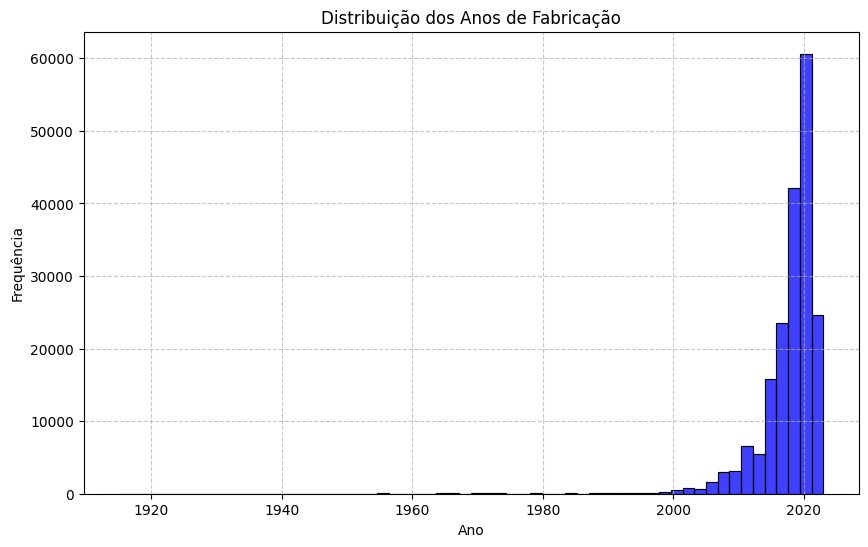

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(sample['year'], bins=60, kde=False, color='blue')
plt.title('Distribuição dos Anos de Fabricação')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()

Com a distribuição dos anos de fabricação, é possível visualizar que existem diversos registros que não vão fazer sentido para a nossa análise, como carros de 1920. Portanto, talvez seja interessante limitar o ano de fabricação de **2000 até 2023**

In [53]:
sample = sample[(sample['year'] >= 2000) & (sample['year'] <= 2023)]

In [54]:
sample.shape

(188466, 20)

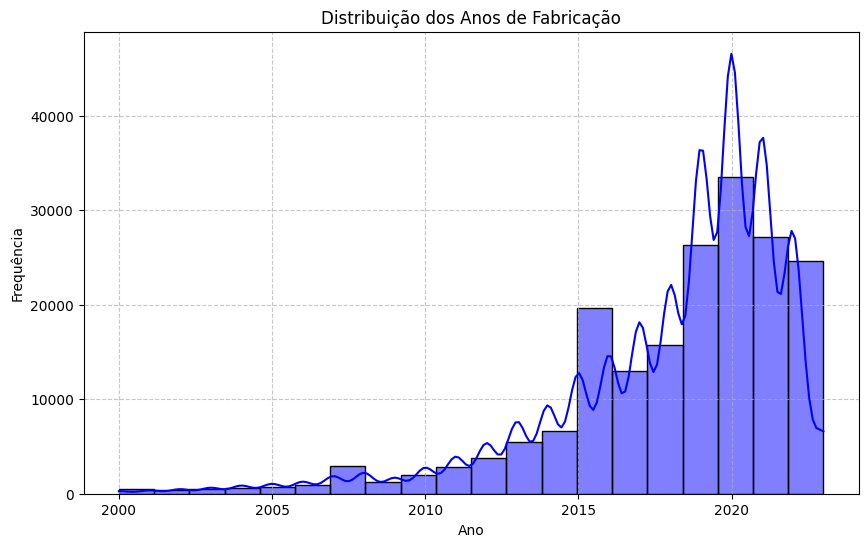

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(sample['year'], bins=20, kde=True, color='blue')
plt.title('Distribuição dos Anos de Fabricação')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()

O tratamento da variável *year* de forma manual permitiu a remoção de registros discrepantes que não acrescentariam na análise, além de evidenciar o **alto pico na distribuição no ano de 2020**, o que indica muitos carros foram fabricados nesse ano.

### price

In [56]:
sample['price'].describe()

count    1.884660e+05
mean     3.781306e+04
std      2.303519e+06
min      1.000000e+00
25%      1.967500e+04
50%      2.799000e+04
75%      3.943700e+04
max      1.000000e+09
Name: price, dtype: float64

É possível perceber que o **desvio padrão** está muito alto em relação à **média**, então a coluna *price* deve possuir **muitos outliers**

In [57]:
sample.shape

(188466, 20)

In [58]:
sample.describe()

year       mileage            mpg  accidents_or_damage  \
count  188466.000000  1.884660e+05  188466.000000         188466.00000   
mean     2018.067705  5.555846e+04      24.569976              0.22222   
std         3.818919  4.322693e+04       5.810902              0.41574   
min      2000.000000  0.000000e+00       0.000000              0.00000   
25%      2016.000000  2.325425e+04      21.500000              0.00000   
50%      2019.000000  4.552150e+04      24.000000              0.00000   
75%      2021.000000  7.800000e+04      27.000000              0.00000   
max      2023.000000  1.119067e+06     127.500000              1.00000   

           one_owner  personal_use_only  seller_rating  driver_rating  \
count  188466.000000      188466.000000  188466.000000  188466.000000   
mean        0.582890           0.666476       4.254026       4.627717   
std         0.493083           0.471473       0.701367       0.269512   
min         0.000000           0.000000       1.000000       1.000000   
25%         0.000000           0.000000       4.100000       4.500000   
50%         1.000000           1.000000       4.500000       4.700000   
75%         1.000000           1.000000       4.600000       4.800000   
max         1.000000           1.000000       5.000000       5.000000   

       driver_reviews_num     price_drop         price  
count       188466.000000  188466.000000  1.884660e+05  
mean            90.273004     837.274113  3.781306e+04  
std            115.298449     976.629237  2.303519e+06  
min              0.000000     100.000000  1.000000e+00  
25%             14.000000     571.250000  1.967500e+04  
50%             51.000000     644.000000  2.799000e+04  
75%            120.000000     750.000000  3.943700e+04  
max           1025.000000   50004.000000  1.000000e+09

É possível observar grandes extremos no sample, por exemplo:<br>

min = 1.0<br>
max = 1000000000.0<br>

Isso significa que a coluna *price* está muito **desbalanceada**, o que pode afeta também no cálculo do IQR. Portanto, a ideia é remover os primeiros e últimos 30 registros, para que valores extremos afetem menos a sample.

In [59]:
sample_price = sample['price'].sort_values(ascending=True).tolist()
print("Lista de preços: ", sample_price)

Lista de preços:  [1.0, 289.0, 299.0, 299.0, 399.0, 399.0, 895.0, 995.0, 999.0, 1195.0, 1295.0, 1295.0, 1295.0, 1395.0, 1395.0, 1400.0, 1495.0, 1495.0, 1495.0, 1500.0, 1500.0, 1500.0, 1795.0, 1795.0, 1795.0, 1795.0, 1795.0, 1800.0, 1800.0, 1800.0, 1855.0, 1933.0, 1942.0, 1950.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1997.0, 1999.0, 1999.0, 1999.0, 1999.0, 1999.0, 2000.0, 2000.0, 2000.0, 2000.0, 2200.0, 2235.0, 2295.0, 2295.0, 2295.0, 2300.0, 2300.0, 2350.0, 2350.0, 2450.0, 2458.0, 2488.0, 2495.0, 2495.0, 2499.0, 2499.0, 2499.0, 2499.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2550.0, 2588.0, 2590.0, 2595.0, 2599.0, 2695.0, 2700.0, 2777.0, 2777.0, 2790.0, 2795.0, 2795.0, 2795.0, 2795.0, 2800.0, 2800.0, 2850.0, 2890.0, 2899.0, 2899.0, 2900.0, 2900.0, 2900.0, 2900.0, 2900.0, 2900.0, 2900.0, 2900.0, 2900.0, 2950.0, 2975.0, 2988.0, 2989.0, 2990.0, 2990.0, 2990.0, 2990.0, 2990.0, 

30 primeiros registros

In [60]:
for i in range(0, 29, 1):
    print(sample_price[i])

1.0
289.0
299.0
299.0
399.0
399.0
895.0
995.0
999.0
1195.0
1295.0
1295.0
1295.0
1395.0
1395.0
1400.0
1495.0
1495.0
1495.0
1500.0
1500.0
1500.0
1795.0
1795.0
1795.0
1795.0
1795.0
1800.0
1800.0


30 últimos registros

In [61]:
for i in sample_price[-29:]:
    print(i)

425900.0
426995.0
428981.0
434995.0
439900.0
439998.0
440000.0
445999.0
474996.0
479996.0
484421.0
495421.0
499989.0
499999.0
515000.0
529996.0
535000.0
550000.0
550000.0
559000.0
740000.0
1111111.0
1150000.0
1275000.0
1390000.0
1400000.0
1495000.0
1575000.0
1000000000.0


Removendo os **30 primeiros** e **30 últimos** registros de price

In [62]:
sample = sample[(sample['price'] > 1800) & (sample['price'] < 425900.0)]

In [63]:
sample['price'].min(), sample['price'].max()

(np.float64(1855.0), np.float64(419888.0))

#### Método IQR

Este método tem como objetivo representar a amplitude do conjunto de dados de **forma central** por meio da distância entre o primeiro quartil(separa os 25% menores valores do restante dos dados) e o terceiro quartil(separa os 25% maiores valores do restante dos dados).

Calculando os quartis

In [64]:
Q1_price = sample['price'].quantile(0.25)
Q3_price = sample['price'].quantile(0.75)

print("1ª Quartil: ", Q1_price)
print("3º Quartil: ", Q3_price)

1ª Quartil:  19682.5
3º Quartil:  39424.5


Calculando o IQR

In [65]:
IQR_price = Q3_price - Q1_price

print("IQR de price: ", IQR_price)

IQR de price:  19742.0


Os valores são considerados outliers se estiverem fora desse intervalo(limites):

Para **outliers inferiores**: Q1 − 1.5 * IQR<br>
Para **outliers superiores**: Q3 + 1.5 * IQR

In [66]:
lower_limit = Q1_price - (1.5 * IQR_price)
higher_limit = Q3_price + (1.5 * IQR_price)

print("Limite inferior: ", lower_limit)
print("Limite superior: ", higher_limit)

Limite inferior:  -9930.5
Limite superior:  69037.5


In [67]:
price_outliers = sample[(sample['price'] < lower_limit) | (sample['price'] > higher_limit)]

In [68]:
outlier_values = price_outliers['price'].sort_values().tolist()
print("Valores outliers:", outlier_values)

Valores outliers: [69057.0, 69100.0, 69111.0, 69112.0, 69115.0, 69125.0, 69140.0, 69173.0, 69184.0, 69190.0, 69190.0, 69190.0, 69191.0, 69200.0, 69206.0, 69206.0, 69206.0, 69210.0, 69215.0, 69233.0, 69256.0, 69259.0, 69280.0, 69280.0, 69287.0, 69290.0, 69291.0, 69307.0, 69308.0, 69323.0, 69366.0, 69370.0, 69371.0, 69376.0, 69376.0, 69383.0, 69383.0, 69385.0, 69390.0, 69393.0, 69400.0, 69400.0, 69410.0, 69420.0, 69421.0, 69434.0, 69435.0, 69436.0, 69437.0, 69446.0, 69451.0, 69457.0, 69462.0, 69477.0, 69478.0, 69481.0, 69490.0, 69492.0, 69493.0, 69494.0, 69495.0, 69495.0, 69495.0, 69495.0, 69495.0, 69495.0, 69496.0, 69497.0, 69498.0, 69499.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69511.0, 69518.0, 69520.0, 69521.0, 69523.0, 69533.0, 69534.0, 69545.0, 69550.0, 69555.0, 69557.0, 69571.0, 69573.0, 69575.0, 69577.0, 69580.0, 69581.0, 69586.0, 

In [69]:
len(outlier_values)

9075

In [70]:
sample = sample[(sample['price'] >= lower_limit) & (sample['price'] <= higher_limit)]

In [71]:
sample.shape

(179332, 20)

#### Boxplot

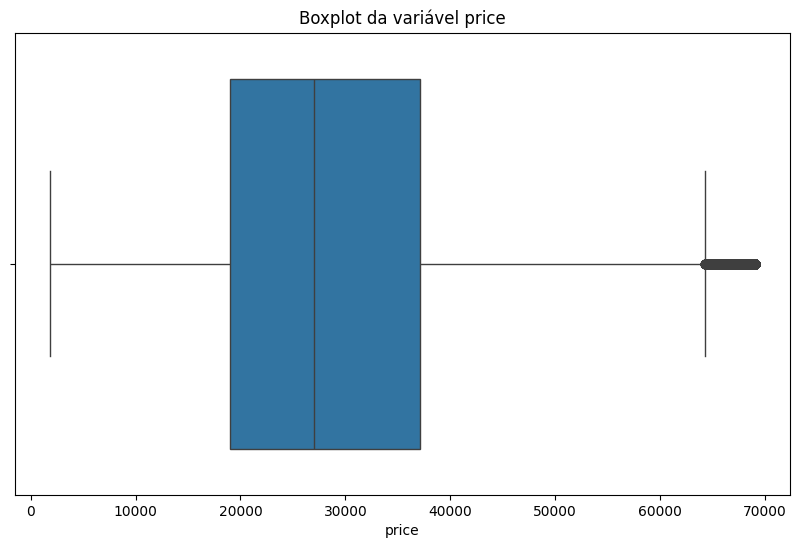

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x=sample['price'])
plt.title('Boxplot da variável price')
plt.show()

In [73]:
sample['price'].max()

np.float64(69000.0)

In [74]:
sample['price'].min()

np.float64(1855.0)

In [75]:
print("Limite superior: ", higher_limit)

Limite superior:  69037.5


Pelo boxplot, é possível visualizar que a sample já não possui mais outliers na coluna *price*. O valor outlier que é mostrado após o valor máximo(69000.0), é limite superior(69037.5) definido do cálculo IQR.

#### Histograma

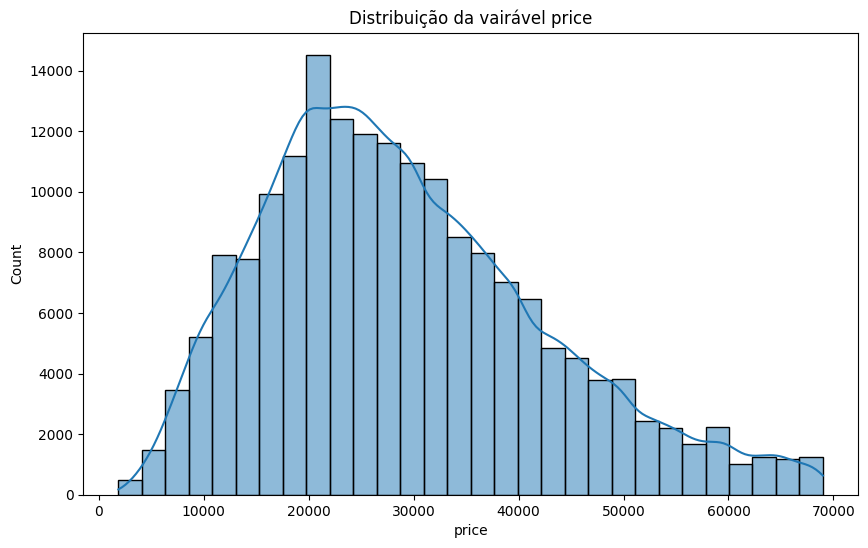

In [76]:
plt.figure(figsize=(10,6))
sns.histplot(sample['price'], kde=True, bins=30)
plt.title('Distribuição da vairável price')
plt.show()

O histograma mostra que mesmo após a remoção de outliers, há valores de price que são maiores, mas em menor quantidade.<br>

Além disso, o pico mais alto no histograma está em torno de 20.000, o que indica que existe uma **maior quantidade de carros com esse valor na sample**.

#### Q-Q Plot

Verificando normalidade com o Q-Q Plot, pois a sample é muito grande

In [77]:
from scipy import stats

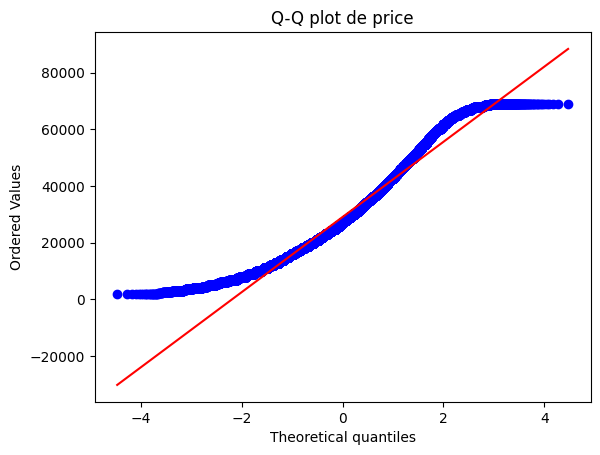

In [78]:
stats.probplot(sample['price'], dist="norm", plot=plt)
plt.title('Q-Q plot de price')
plt.show()

Tendo como base que a linha vermelha representa uma distribuição normal dos dados, é possível ver que ele **não segue uma distribuição normal de forma ideal**. <br>

Isso pode evidenciar valores um pouco mais extremos nas duas caudas, principalmente valores mais baixos de price que foram mantidos na sample.

Com o histograma e o Q-Q PLot, é possível concluir que é uma **distribuição assimétrica positiva**.

### mileage

In [79]:
sample['mileage'].min()

np.float64(0.0)

In [80]:
zero_mileage_count = (sample['mileage'] == 0.0).sum()
print("Quantidade de valores 0.0 em mileage:", zero_mileage_count)

Quantidade de valores 0.0 em mileage: 269


Não faz sentido o carro ter **0.0 milhas percorridas**, se é um dataset de **carros usados**

Verificando os registros com **0.0 milhas percorridas**

In [81]:
zero_mileage_records = sample[sample['mileage'] <= 5.0]

In [82]:
zero_mileage_records.head(30)

manufacturer                             model  year  mileage  \
375651           Jeep                 Gladiator Rubicon  2023      2.0   
34513             BMW                      330 i xDrive  2022      0.0   
41525             BMW                           M Coupe  2000      0.0   
389118           Jeep        Wrangler Unlimited Rubicon  2017      0.0   
466334          Lexus                           RX 450h  2022      5.0   
418685            Kia                  Optima Hybrid EX  2013      0.0   
96669       Chevrolet                  Suburban 1500 LT  2010      0.0   
38125             BMW                      X1 sDrive28i  2021      0.0   
528530  Mercedes-Benz               GLB 250 Base 4MATIC  2023      0.0   
38908             BMW                      X7 xDrive40i  2019      0.0   
272747            GMC                   Sierra 1500 SLT  2017      0.0   
131156      Chevrolet                     Avalanche LTZ  2013      0.0   
95919        Cadillac                          Escalade  2007      0.0   
46198             BMW                             525 i  2007      0.0   
458168     Land Rover       Discovery Sport R-Dynamic S  2022      1.0   
483515          Lexus                            IS 300  2023      5.0   
67787           Buick                   Envision Avenir  2023      5.0   
280467            GMC                        Canyon SLE  2006      0.0   
325911          Honda                      Odyssey EX-L  2006      0.0   
554332     Mitsubishi            Outlander Sport 2.0 SE  2023      1.0   
511103          Mazda  CX-50 2.5 S Premium Plus Package  2023      2.0   
168421          Dodge                  Grand Caravan GT  2017      0.0   
537420  Mercedes-Benz                      CLA 250 Base  2023      2.0   
85864        Cadillac                CT4 Premium Luxury  2023      5.0   
267138           Ford                 Shelby GT350 Base  2018      0.0   
176080          Dodge                        Avenger SE  2014      0.0   
604505         Nissan                    Rogue Sport SL  2022      3.0   
177387          Dodge                       Journey SXT  2009      0.0   
190683           Ford                          Focus SE  2012      0.0   
275567            GMC                      Yukon Denali  2017      0.0   

                                          engine  \
375651                     3.6L V6 24V MPFI DOHC   
34513                 2.0L I4 16V GDI DOHC Turbo   
41525                      3.2L I6 24V MPFI DOHC   
389118                     3.6L V6 24V MPFI DOHC   
466334               3.5L V6 24V PDI DOHC Hybrid   
418685              2.4L I4 16V MPFI DOHC Hybrid   
96669         5.3L V8 16V MPFI OHV Flexible Fuel   
38125                 2.0L I4 16V GDI DOHC Turbo   
528530                2.0L I4 16V GDI DOHC Turbo   
38908                 3.0L I6 24V GDI DOHC Turbo   
272747                       6.2L V8 16V GDI OHV   
131156                      5.3L V8 16V MPFI OHV   
95919                       6.2L V8 16V MPFI OHV   
46198                      3.0L I6 24V MPFI DOHC   
458168                                        I4   
483515                      3.5L V6 24V PDI DOHC   
67787                 2.0L I4 16V GDI DOHC Turbo   
280467                     3.5L I5 20V MPFI DOHC   
325911  3.5L SOHC MPFI 24-valve i-VTEC V6 engine   
554332                     2.0L I4 16V MPFI DOHC   
511103                      2.5L I4 16V GDI DOHC   
168421                     3.6L V6 24V MPFI DOHC   
537420                2.0L I4 16V GDI DOHC Turbo   
85864                 2.0L I4 16V GDI DOHC Turbo   
267138                     5.2L V8 32V MPFI DOHC   
176080                     2.4L I4 16V MPFI DOHC   
604505                      2.0L I4 16V GDI DOHC   
177387                     3.5L V6 24V MPFI SOHC   
190683        2.0L I4 16V GDI DOHC Flexible Fuel   
275567                       6.2L V8 16V GDI OHV   

                             transmission         drivetrain      fuel_type  \
375651                

Com essa visualização, foi possível constatar que são **registros anômalos**.<br>
Muitos desses carros com 0.0 milhas rodadas mostram que já **sofreram acidentes**, com a coluna *accidents_or_damage* = 1.0<br>

Porém, excluir esses registros não vai gerar muitos resultados ou impactar na nossa análise, então resolvi mantê-los para evitar que o dataset possa ficar enviesado.

### manufacturer

In [83]:
sample.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                    float64
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [84]:
sample['manufacturer'].value_counts()

manufacturer
Ford             18672
Toyota           14648
Chevrolet        12932
Nissan           12122
Jeep             10076
Honda             9236
Kia               8861
Mercedes-Benz     8578
BMW               8510
GMC               6419
Subaru            6076
Volkswagen        5996
Dodge             5902
Hyundai           5550
Lexus             5212
RAM               4411
Audi              4277
Cadillac          3947
Mazda             3836
Buick             3601
INFINITI          3138
Chrysler          3091
Volvo             2452
Lincoln           2413
Land Rover        2412
Acura             2088
Porsche           1409
Mitsubishi        1398
Tesla             1270
Jaguar             799
Name: count, dtype: int64

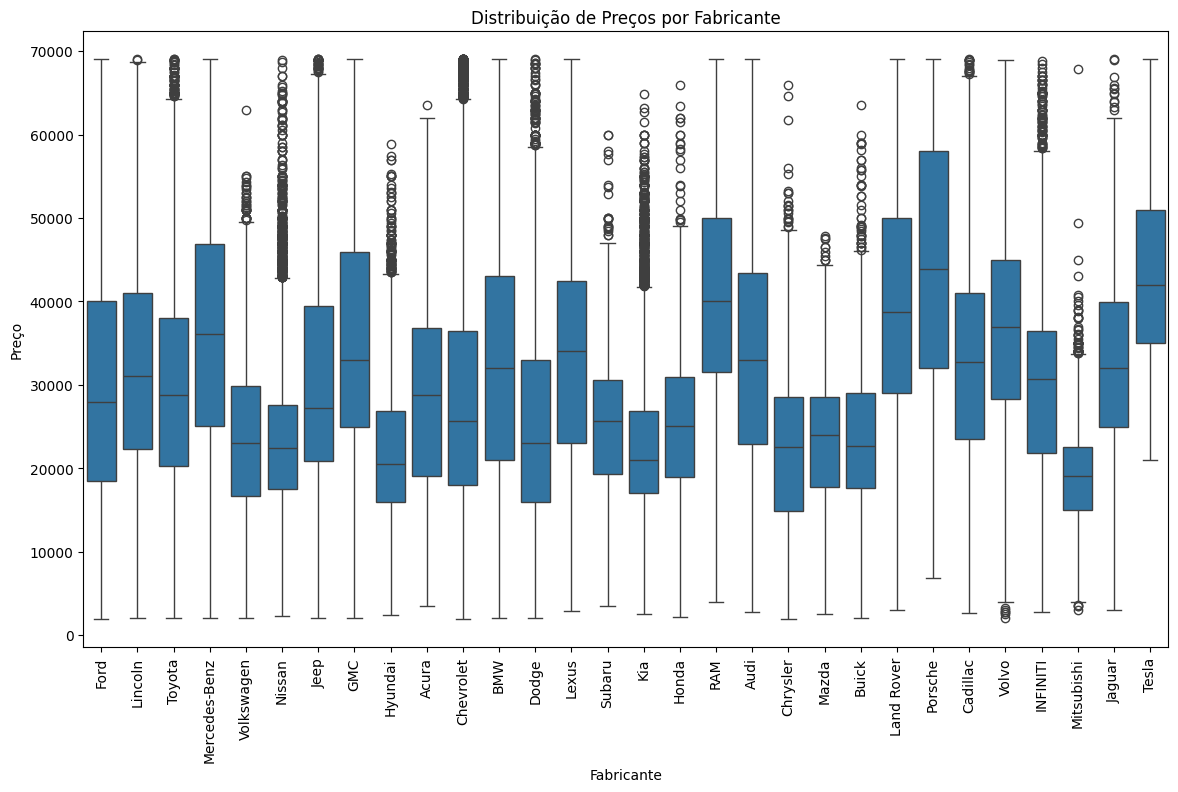

In [85]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='manufacturer', y='price', data=sample)
plt.xticks(rotation=90)
plt.title('Distribuição de Preços por Fabricante')
plt.ylabel('Preço')
plt.xlabel('Fabricante')
plt.show()

In [86]:
manufacturer_counts = sample['manufacturer'].value_counts().iloc[::-1]
manufacturer_counts

manufacturer
Jaguar             799
Tesla             1270
Mitsubishi        1398
Porsche           1409
Acura             2088
Land Rover        2412
Lincoln           2413
Volvo             2452
Chrysler          3091
INFINITI          3138
Buick             3601
Mazda             3836
Cadillac          3947
Audi              4277
RAM               4411
Lexus             5212
Hyundai           5550
Dodge             5902
Volkswagen        5996
Subaru            6076
GMC               6419
BMW               8510
Mercedes-Benz     8578
Kia               8861
Honda             9236
Jeep             10076
Nissan           12122
Chevrolet        12932
Toyota           14648
Ford             18672
Name: count, dtype: int64

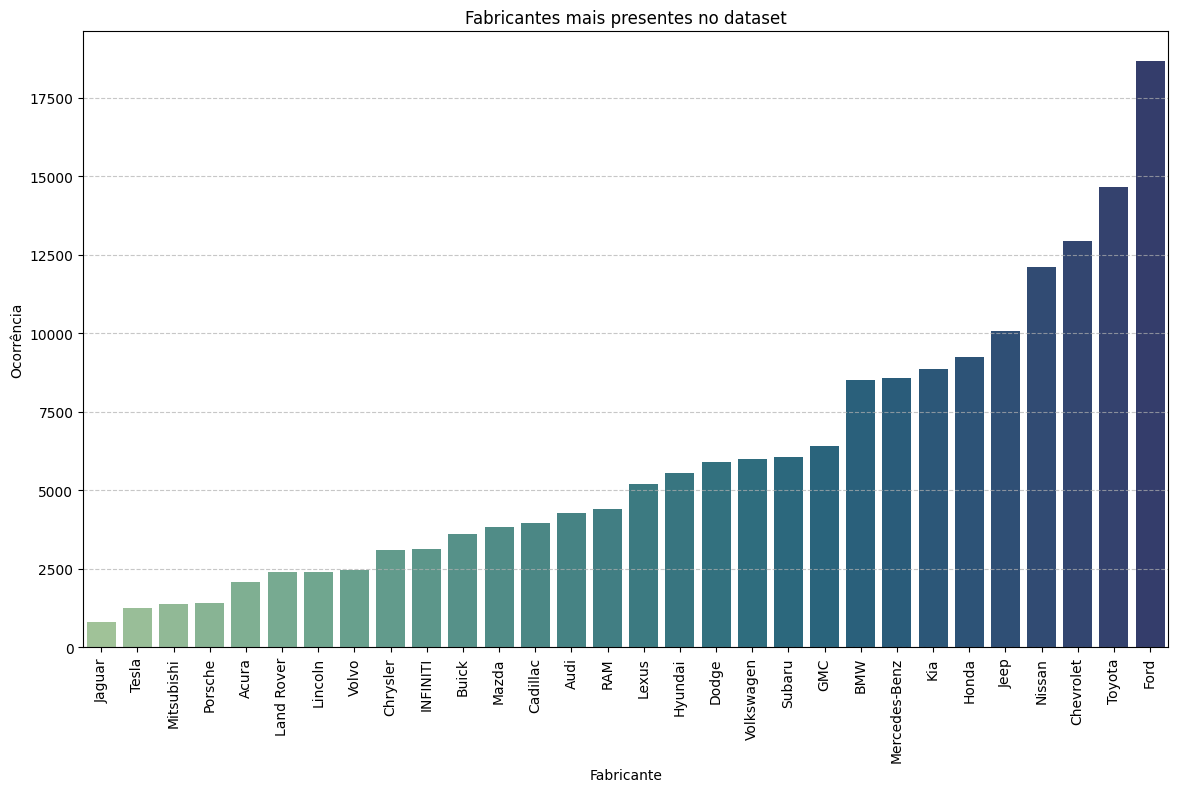

In [87]:
plt.figure(figsize=(14, 8))
sns.barplot(y=manufacturer_counts.values, x=manufacturer_counts.index, palette='crest', hue=manufacturer_counts.index)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title('Fabricantes mais presentes no dataset')
plt.ylabel('Ocorrência')
plt.xlabel('Fabricante')
plt.show()

### fueltype

In [88]:
fueltype_counts = sample['fuel_type'].value_counts()
fueltype_counts

fuel_type
Gasoline                         153427
Hybrid                             7054
Diesel                             5343
Not Informed                       4930
E85 Flex Fuel                      4576
Electric                           3446
B                                   330
Flexible Fuel                       117
Plug-In Hybrid                       22
Gasoline/Mild Electric Hybrid        21
Gasoline Fuel                        20
G                                    12
Premium Unleaded                     11
Regular Unleaded                     10
Compressed Natural Gas                5
PHEV                                  1
Diesel Fuel                           1
Hybrid Fuel                           1
Premium                               1
Other                                 1
Premium (Required)                    1
E85 Fl                                1
Biodiesel                             1
Name: count, dtype: int64

In [89]:
sample['fuel_type'].nunique()

23

Com essa quantidade de tipos de combustíveis com poucas ocorrências, é possível agrupá-los em um único tipo, como **'Outros'**<br>
Por exemplo, a partir do combustível *B*

In [90]:
small_categories = fueltype_counts[fueltype_counts <= 330].index
small_categories

Index(['B', 'Flexible Fuel', 'Plug-In Hybrid', 'Gasoline/Mild Electric Hybrid',
       'Gasoline Fuel', 'G', 'Premium Unleaded', 'Regular Unleaded',
       'Compressed Natural Gas', 'PHEV', 'Diesel Fuel', 'Hybrid Fuel',
       'Premium', 'Other', 'Premium (Required)', 'E85 Fl', 'Biodiesel'],
      dtype='object', name='fuel_type')

In [91]:
def replace_fuel_type(value):
    if value in small_categories:
        return 'Other'  
    else:
        return value  

sample['fuel_type'] = sample['fuel_type'].apply(replace_fuel_type)

In [92]:
sample['fuel_type'].value_counts()

fuel_type
Gasoline         153427
Hybrid             7054
Diesel             5343
Not Informed       4930
E85 Flex Fuel      4576
Electric           3446
Other               556
Name: count, dtype: int64

### drivetrain

In [93]:
drivetrain_counts = sample['drivetrain'].value_counts()
drivetrain_counts

drivetrain
Front-wheel Drive                                              60114
All-wheel Drive                                                54338
Four-wheel Drive                                               35234
Rear-wheel Drive                                               21905
Not Informed                                                    4385
FWD                                                             1565
AWD                                                              854
4WD                                                              409
RWD                                                              403
All-Wheel Drive                                                   29
Front-Wheel Drive                                                 22
Front-Wheel Drive with Limited-Slip Differential                  11
Four-Wheel Drive with Locking and Limited-Slip Differential       11
Unknown                                                            9
All-Wheel Drive with Lo

In [94]:
small_categories = drivetrain_counts[drivetrain_counts <= 29].index
small_categories

Index(['All-Wheel Drive', 'Front-Wheel Drive',
       'Front-Wheel Drive with Limited-Slip Differential',
       'Four-Wheel Drive with Locking and Limited-Slip Differential',
       'Unknown', 'All-Wheel Drive with Locking and Limited-Slip Differential',
       'Rear-Wheel Drive', 'Four-Wheel Drive', 'Front Wheel Drive',
       'Rear-Wheel Drive with Limited-Slip Differential', 'All Wheel Drive',
       'Four Wheel Drive', '4x4', 'Rear Wheel Drive',
       'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT',
       'All-Wheel Drive with Locking Differential',
       'Four-Wheel Drive with Locking Differential'],
      dtype='object', name='drivetrain')

In [95]:
def replace_drivetrain(value):
    if value in small_categories:
        return 'Other'  
    else:
        return value  

sample['drivetrain'] = sample['drivetrain'].apply(replace_drivetrain)

In [96]:
sample['drivetrain'].value_counts()

drivetrain
Front-wheel Drive    60114
All-wheel Drive      54338
Four-wheel Drive     35234
Rear-wheel Drive     21905
Not Informed          4385
FWD                   1565
AWD                    854
4WD                    409
RWD                    403
Other                  125
Name: count, dtype: int64

### engine

In [97]:
sample['engine'].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                                          18741
3.6L V6 24V MPFI DOHC                                                8605
3.6L V6 24V GDI DOHC                                                 6788
2.0L I4 16V MPFI DOHC                                                4942
1.5L I4 16V GDI DOHC Turbo                                           4526
                                                                    ...  
Engine, 3.6L Variable Valve Timing V6 DI Direct Injection (304 h        1
3.5L V6 ECOBOOST ENGINE                                                 1
3.5L ECOBOOST                                                           1
4.6L V8 16V MPFI OHV                                                    1
Turbocharged Gas I4 1.5L/                                               1
Name: count, Length: 3220, dtype: int64

In [98]:
for x in sample['engine'].value_counts():
    print(x)

18741
8605
6788
4942
4526
4373
4320
3791
3407
3241
3186
3124
2820
2522
2377
2316
2246
2236
2202
2159
2032
1932
1807
1775
1774
1660
1655
1628
1432
1419
1300
1283
1281
1281
1226
1221
1134
1130
1100
1056
1053
1051
1051
997
989
978
967
958
945
931
900
885
841
741
710
702
629
623
596
595
562
558
528
526
470
454
449
441
437
405
395
384
384
378
360
349
344
329
324
322
321
311
294
291
283
282
281
281
279
276
274
262
261
252
244
243
233
228
225
220
219
217
216
212
211
209
205
203
191
190
189
188
178
175
174
171
170
169
168
166
162
159
157
152
147
139
139
138
131
127
126
126
125
125
123
122
122
121
121
119
119
119
118
117
116
114
114
114
114
111
110
110
110
109
109
108
108
107
107
107
106
105
105
104
104
100
100
99
99
99
98
95
94
93
93
92
92
91
90
87
86
85
85
85
85
83
83
82
82
82
79
78
77
77
77
77
77
76
76
75
75
75
74
73
72
72
70
70
69
68
68
68
68
67
67
67
66
65
64
64
64
64
63
63
63
62
62
61
60
60
60
58
58
57
57
57
57
56
56
56
56
55
55
55
55
55
55
55
54
53
53
53
53
53
52
52
52
51
51
50
50
50
50


Resolvi manter como padrão a variável Engine

### transmission

In [99]:
sample['transmission'].value_counts()

transmission
6-Speed Automatic                              36599
8-Speed Automatic                              33311
Automatic CVT                                  27288
Automatic                                      21547
9-Speed Automatic                              14596
                                               ...  
7 Speed PDK                                        1
Automatic, 6-Spd w/Dual-Clutch & Sportmatic        1
ECVT (Continuously Variable)                       1
1-SPEED G                                          1
4-Speed Automatic with Sportshift Manual 4A        1
Name: count, Length: 522, dtype: int64

In [100]:
sample['transmission'].nunique()

522

In [101]:
for x in sample['transmission'].value_counts():
    print(x)

36599
33311
27288
21547
14596
8220
5751
4479
3424
3303
3069
2717
2049
1508
911
790
736
718
628
598
287
245
217
212
211
198
197
188
154
149
137
135
130
126
121
111
104
94
94
85
81
79
77
75
75
72
69
65
63
62
61
61
60
59
58
58
55
54
54
50
49
48
47
47
46
44
42
41
40
40
39
38
37
36
36
36
33
33
32
32
30
29
29
27
27
25
25
24
24
23
21
21
21
21
19
19
18
18
18
17
17
17
17
17
17
17
16
16
16
16
15
15
15
15
15
14
14
14
14
13
13
13
13
13
13
13
13
13
12
12
12
11
11
10
10
10
10
9
9
9
9
9
9
9
9
9
9
8
8
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

### model

In [102]:
sample['model'].value_counts()

model
Fusion SE              766
Sportage LX            762
Corolla LE             758
GLC 300 Base 4MATIC    694
Rogue SV               675
                      ... 
F-PACE P340 S            1
Sienna XLE Premiu        1
STS AWD w/1SB            1
Pilot AWD Sport          1
Panamera RWD             1
Name: count, Length: 7038, dtype: int64

Também resolvi não mexer na variável model

### exterior_color

In [103]:
sample['exterior_color'].value_counts()

exterior_color
Black                        13684
White                        11846
Gray                          7250
Silver                        5884
Blue                          4164
                             ...  
Tuscan Bronze ChromaFlair        1
GY                               1
Magnetic Red Ii Metallic         1
Sparkling Ruby                   1
Ice Wine                         1
Name: count, Length: 4272, dtype: int64

In [104]:
for x in sample['exterior_color'].value_counts().index:
    print(x)

Black
White
Gray
Silver
Blue
Summit White
Red
Bright White Clearcoat
Not Informed
Gun Metallic
Oxford White
Granite Crystal Clearcoat Metallic
Alpine White
Polar White
Billet Silver Metallic Clearcoat
Pure White
Silver Ice Metallic
Satin Steel Metallic
Crystal Black Pearl
Shadow Black
Crystal White Pearl
Black Sapphire Metallic
Ice Silver Metallic
Black Clearcoat
Brilliant Silver Metallic
Platinum White Pearl
Modern Steel Metallic
Diamond Black
Super White
Onyx Black
Snow White Pearl
Magnetic Gray Metallic
Midnight Black Metallic
Ebony Twilight Metallic
Deep Black Pearl Effect
Platinum Gray Metallic
Glacier White
Mosaic Black Metallic
Lunar Silver Metallic
Super Black
Crystal Black Silica
Fuji White
Quicksilver Metallic
Jet Black
Magnetic Black
Brilliant Black Crystal Pearlcoat
Magnetic Metallic
Magnetite Gray Metallic
Jet Black Mica
Black Obsidian
Agate Black Metallic
Santorini Black
Graphite Shadow
Blizzard Pearl
White Knuckle Clearcoat
Ebony Black
Velvet Red Pearlcoat
Glacier White 

In [105]:
for x in sample['exterior_color'].value_counts():
    print(x)

13684
11846
7250
5884
4164
3886
3499
3240
2046
1985
1985
1477
1269
1246
1240
1143
1109
1027
1017
1000
987
978
966
934
934
921
920
907
901
887
884
880
828
821
794
790
724
722
721
696
689
653
649
648
645
614
607
598
560
557
514
513
504
502
494
492
481
479
464
459
458
454
448
448
445
435
435
434
430
425
424
422
419
415
410
403
393
384
381
372
370
362
357
356
356
355
350
348
342
332
328
326
315
309
304
303
302
298
296
288
286
286
284
283
281
278
276
276
275
274
272
272
270
269
266
263
259
258
253
247
241
240
237
236
235
232
226
223
223
223
222
222
222
221
220
219
217
217
216
216
214
214
212
209
206
205
205
203
203
202
201
201
200
199
199
191
191
189
188
187
186
185
184
183
182
181
179
178
177
176
174
173
171
170
170
167
166
165
164
164
163
163
161
160
160
159
158
158
157
156
154
153
153
152
152
151
151
148
145
144
144
143
142
142
141
140
140
140
136
134
134
133
132
132
131
130
129
128
127
125
125
124
124
123
121
120
118
117
117
116
116
115
115
115
115
115
114
114
113
112
112
111
110
110
11

#### Agrupando as cores primárias

Uma abordagem que eu resolvi adotar para as cores externas do carro, foi agrupar várias categorias relacionadas às suas cores primárias.

Visualizando as cores presentes na sample, constatei que as principais são essas:<br>
**Black, White, Gray, Blue, Red, Silver, Grey e Gold**<br>

As cores que não se encaixam em nenhuma das categorias acima, serão **'Other'**

In [106]:
main_colors = ['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Gold', 'Grey', 'Green']

def replace_exterior_color(value):
    for color in main_colors:
        if color.lower() in value.lower():
            return color;
    return 'Other'

sample['exterior_color'] = sample['exterior_color'].apply(replace_exterior_color)

In [107]:
sample['exterior_color'].value_counts()

exterior_color
White     41749
Black     37379
Other     27080
Silver    22017
Gray      19005
Blue      16090
Red       13249
Green      1412
Grey        808
Gold        543
Name: count, dtype: int64

### interior color

In [108]:
sample['interior_color'].value_counts()

interior_color
Black                              67442
Not Informed                       13317
Gray                               12039
Jet Black                          10521
Ebony                               9019
                                   ...  
Rc20                                   1
Black / Arras Red                      1
Ebony/Dark Titanium                    1
Tupelo Black                           1
Canyon / Black / Charcoal Black        1
Name: count, Length: 2349, dtype: int64

In [109]:
for x in sample['interior_color'].value_counts():
    print(x)

67442
13317
12039
10521
9019
6608
3704
3619
2317
2130
1622
1054
920
894
836
834
776
677
645
641
577
559
544
490
473
458
448
442
428
406
400
394
393
382
380
374
355
350
344
339
336
330
327
321
293
292
288
282
277
277
276
271
268
257
256
250
245
234
233
233
233
200
199
198
195
189
187
184
182
178
177
171
169
168
162
159
156
155
154
153
151
151
151
150
145
144
142
141
139
137
137
132
131
130
129
128
128
127
124
124
121
121
120
120
119
118
116
116
114
114
112
109
105
104
102
98
98
95
95
95
95
95
94
92
89
89
89
89
88
86
86
85
85
85
83
83
82
81
81
79
79
78
78
78
77
74
73
72
72
72
71
71
70
70
68
67
67
67
66
65
65
64
64
64
62
62
62
62
62
61
61
61
61
61
60
59
59
58
57
57
56
56
56
55
55
55
55
55
55
54
54
54
53
53
53
52
51
50
50
50
50
49
49
48
48
48
46
45
45
45
45
44
44
44
44
43
42
42
42
42
42
41
41
41
40
40
40
40
40
40
39
39
39
39
39
39
38
38
38
38
38
37
37
37
36
36
36
36
36
36
36
36
36
36
35
35
35
34
33
33
33
33
32
31
31
31
31
31
31
31
31
30
30
30
30
30
30
30
30
29
29
29
29
29
29
29
28
28
28
27

In [110]:
for x in sample['interior_color'].value_counts().index:
    print(x)

Black
Not Informed
Gray
Jet Black
Ebony
Charcoal
Graphite
Beige
Titan Black
Tan
Charcoal Black
Ivory
Diesel Gray / Black
Ash
Red
Parchment
Brown
Light Gray
Ebony Black
Wheat
Dark Slate Gray
Medium Earth Gray
Ebony / Ebony
Medium Light Stone
Dark Gray
Global Black
Cognac
Black / Graphite
Macchiato Beige
Dark Galvanized
Black / Light Graystone
Black Onyx
Medium Pewter
Sport
Sandstone
Cappuccino
White
Satin Black
Almond
Steel
Blond
Black / Red
Silk Beige / Black
Cocoa / Dune
Cashmere
Canberra Beige
Mocha
BLACK
Cream
Medium Ash Gray
Light Neutral
Medium Stone
Cement
Cocoa
Shale
Stone
Taupe
Pewter
Dune
Sand
Dark Charcoal
Jet Black / Dark Ash
Black MB-Tex
Shara Beige
Black / Gray
Rioja Red
Camel
Okapi Brown
Dark Palazzo Gray
Ruby Red
Espresso
Ivory White
Sand Beige
Silk Beige
Java Brown
Diesel Gray/Black
Cirrus
Bisque
Dark Earth Gray
Dark Ash
Java
Black Graphite
Off Black
Saddle Brown
Gray / Black
Dark Atmosphere
Oyster
Dark Walnut
Light Platinum / Jet Black
Rock Gray
Light Titanium
Whisper 

Como a variável interior_color tem **'Not Informed'** como segunda categoria mais frequente, resolvi não utilizá-la na minha análise, pois acredito que ela será pouco relevante para prever o preço.

In [111]:
sample = sample.drop(columns=['interior_color'])
sample.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

### seller_name

seller_name é uma coluna que não terá nenhuma influência no preço, então podemos excluí-la.

In [112]:
sample = sample.drop(columns=['seller_name'])
sample.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

In [113]:
sample.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

In [114]:
sample.shape

(179332, 18)

## Processamento e transformação

### Correlação de Pearson

In [115]:
from scipy.stats import pearsonr

In [116]:
for col in numerical_vars.columns:
    corr, p_value = pearsonr(sample[col], sample['price'])
    print(f"Correlação entre {col} e price: \nCorrelação: {corr:.2f}\np-value: {p_value:.5f}")
    print("\n")

Correlação entre price e price: 
Correlação: 1.00
p-value: 0.00000


Correlação entre price_drop e price: 
Correlação: 0.14
p-value: 0.00000


Correlação entre year e price: 
Correlação: 0.59
p-value: 0.00000


Correlação entre mileage e price: 
Correlação: -0.57
p-value: 0.00000


Correlação entre mpg e price: 
Correlação: -0.26
p-value: 0.00000


Correlação entre personal_use_only e price: 
Correlação: -0.01
p-value: 0.00244


Correlação entre accidents_or_damage e price: 
Correlação: -0.21
p-value: 0.00000


Correlação entre one_owner e price: 
Correlação: 0.29
p-value: 0.00000


Correlação entre seller_rating e price: 
Correlação: 0.09
p-value: 0.00000


Correlação entre driver_rating e price: 
Correlação: 0.09
p-value: 0.00000


Correlação entre driver_reviews_num e price: 
Correlação: -0.31
p-value: 0.00000




In [117]:
numerical_sample_vars = sample.select_dtypes(include='number')

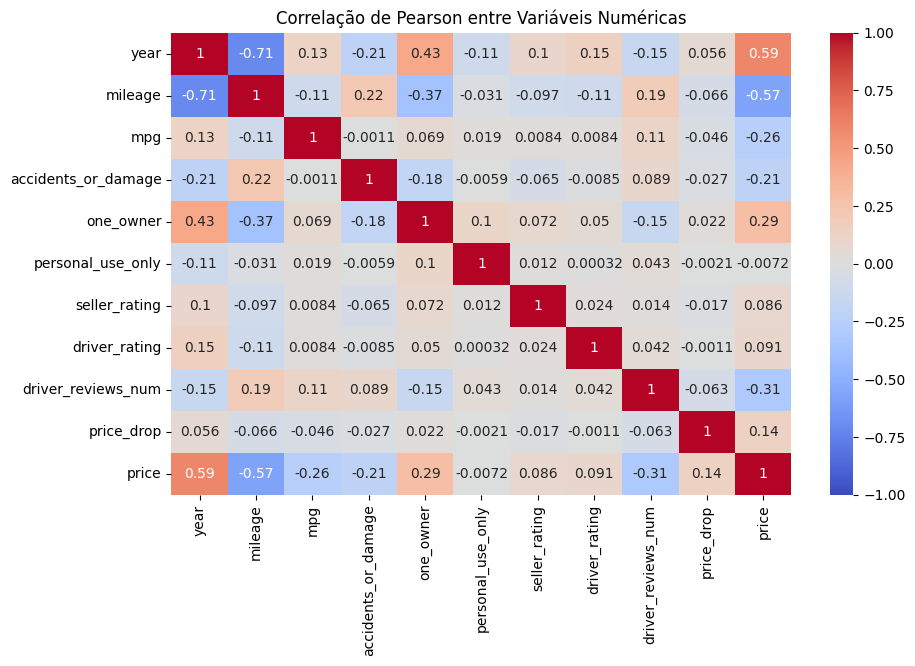

In [118]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_sample_vars.corr(method='pearson'), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1);
plt.title("Correlação de Pearson entre Variáveis Numéricas")
plt.show()

Comparando a diferença dos valores da Correlação de Pearson desse heatmap acima com o heatmap plotado antes do tratamento das variáveis, é notório que tanto as **correlações positivas**, quanto **negativas** melhoraram.

### Correlação de Spearman

O objetivo na utilização da Correlação de Spearman é verificar quais **variáveis múmericas** serão interessantes de se manter para a realização do treinamento.

A correlação de Spearman é muito adequada, pois ela apenas avalia se as variáveis seguem um padrão de ordem (monotonia) e pode ser usada mesmo quando os dados **não são normalmente distribuídos**, o que se encaixa neste caso.

In [119]:
from scipy.stats import spearmanr

In [120]:
numerical_vars

price  price_drop  year  mileage   mpg  personal_use_only  \
191809  10994.0       590.0  2018  94746.0  29.5                1.0   
488330  17498.0       500.0  2014  55710.0  27.5                1.0   
713389  42995.0       644.0  2022  15022.0  24.0                1.0   
531766  17995.0       505.0  2014  78600.0  23.5                0.0   
216502  63999.0       644.0  2017  70365.0  24.0                1.0   
...         ...         ...   ...      ...   ...                ...   
489863  32000.0       500.0  2021  22369.0  25.0                0.0   
513217  32217.0       644.0  2020  51915.0  24.5                1.0   
59014   40000.0       644.0  2021  41279.0  24.0                0.0   
314423  23892.0       253.0  2021  16722.0  29.0                1.0   
42849   30276.0       382.0  2020  28559.0  28.0                0.0   

        accidents_or_damage  one_owner  seller_rating  driver_rating  \
191809                  0.0        1.0            4.3            4.6   
488330                  0.0        0.0            3.8            4.7   
713389                  0.0        1.0            4.5            4.8   
531766                  0.0        0.0            4.4            4.7   
216502                  0.0        1.0            4.6            4.6   
...                     ...        ...            ...            ...   
489863                  0.0        1.0            4.9            4.8   
513217                  0.0        1.0            4.8            4.8   
59014                   0.0        0.0            4.5            4.7   
314423                  1.0        1.0            4.5            4.7   
42849                   0.0        1.0            4.7            4.9   

        driver_reviews_num  
191809               202.0  
488330                69.0  
713389                13.0  
531766               100.0  
216502               163.0  
...                    ...  
489863                 9.0  
513217                36.0  
59014                 29.0  
314423                45.0  
42849                  5.0  

[189970 rows x 11 columns]

Verificando a **Correlação de Spearman** para variáveis numéricas

In [121]:
for col in numerical_vars.columns:
    corr, p_value = spearmanr(sample[col], sample['price'])
    print(f"Correlação entre {col} e price: \nCorrelação: {corr:.2f}\np-value: {p_value:.5f}")
    print("\n")

Correlação entre price e price: 
Correlação: 1.00
p-value: 0.00000


Correlação entre price_drop e price: 
Correlação: 0.11
p-value: 0.00000


Correlação entre year e price: 
Correlação: 0.65
p-value: 0.00000


Correlação entre mileage e price: 
Correlação: -0.63
p-value: 0.00000


Correlação entre mpg e price: 
Correlação: -0.29
p-value: 0.00000


Correlação entre personal_use_only e price: 
Correlação: -0.01
p-value: 0.01899


Correlação entre accidents_or_damage e price: 
Correlação: -0.23
p-value: 0.00000


Correlação entre one_owner e price: 
Correlação: 0.32
p-value: 0.00000


Correlação entre seller_rating e price: 
Correlação: 0.10
p-value: 0.00000


Correlação entre driver_rating e price: 
Correlação: 0.22
p-value: 0.00000


Correlação entre driver_reviews_num e price: 
Correlação: -0.45
p-value: 0.00000




Com esse resultado é importante analisar os 2 fatores, tanto a **correlação** encontrada, quanto o **p-value**<br>

A correlação de uma variável ser **negativa**, indica que à medida que a **variável aumenta**, o **preço** tende a **diminuir**.<br>
A correlação de uma variável ser **positiva**, indica que à medida que uma **variável aumenta**, o preço tende a **aumentar**.

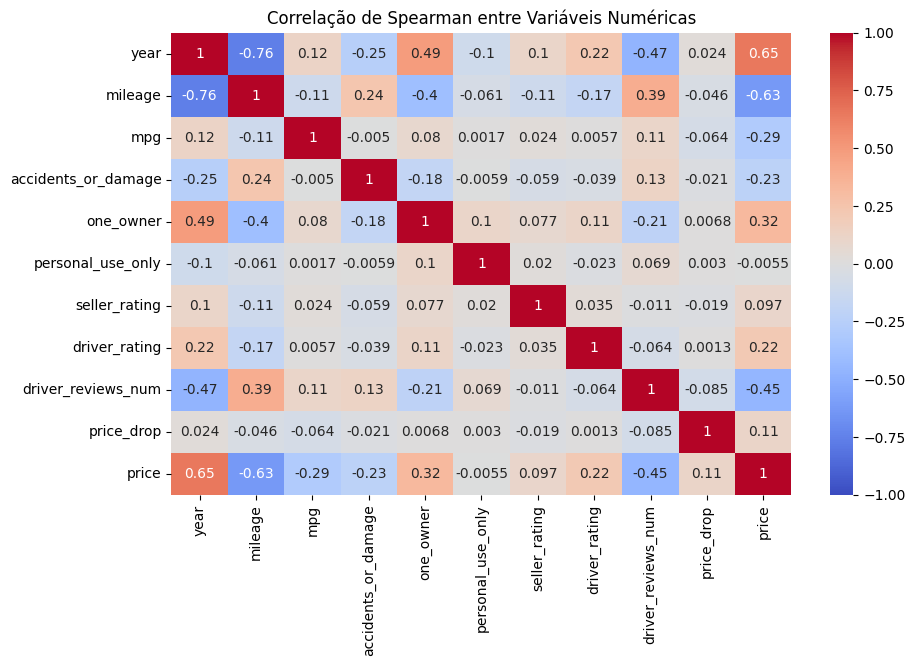

In [122]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_sample_vars.corr(method='spearman'), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1);
plt.title("Correlação de Spearman entre Variáveis Numéricas")
plt.show()

Pela Correlação de Spearman ser mais adequada para bases que **não seguem um padrão normal**, foi possível obter melhores valores de correlações entre as variáveis, se comparada com a Correlação de Pearson.

### Transformação de variáveis categóricas

A ideia, é realizar o **Target Encoding** para transformar as variáveis categóricas mantidas na sample para variáveis numéricas.

O **Target Encoding** é uma excelente alternativa ao uso do **One Hot Encoding** no contexto em que estamos trabalhando, pois ele evitará que uma grande quantidade de colunas sejam criadas devido a quantidade de categorias presentes nas variáveis de estudo.<br>

O **Target Encoding** consiste em substituir as classes da feature pela média de seu alvo.

In [123]:
categorical_columns = sample.select_dtypes(include='object').columns
print('Variáveis categóricas:')
print(categorical_columns)

Variáveis categóricas:
Index(['manufacturer', 'model', 'engine', 'transmission', 'drivetrain',
       'fuel_type', 'exterior_color'],
      dtype='object')


#### Aplicando o Target Encoding

Os parâmetros smoothing e min_samples_leaf foram aplicados.<br>

**smoothing** serve para ajudar a regular o equilíbrio entre a média global e a média da categoria. Isso porque, valores mais baixos dão mais pesos as categorias, já valores altos aumentam o peso da média global, o que ajuda a regularizar categorias com menos dados.

O **min_samples_leaf** define o número mínimo de amostras necessárias em uma categoria para que a média da categoria tenha mais peso.

In [124]:
from category_encoders import TargetEncoder

In [125]:
y = sample['price']

for col in categorical_columns:
    TE = TargetEncoder(
        smoothing=10,
        min_samples_leaf=15
    )
    X = sample[col]
    sample[col] = TE.fit_transform(X, y)

In [126]:
sample.head()

manufacturer         model  year  mileage        engine  transmission  \
191809  30413.641067  11998.147065  2018  94746.0  11789.822785  16359.151857   
488330  32504.913386  13977.382899  2014  55710.0  31967.885598  24272.156753   
713389  29417.694771  35628.639321  2022  15022.0  36904.078488  31952.960191   
531766  36199.699580  27795.654519  2014  78600.0  27177.984031  30351.337727   
216502  30413.641067  56319.184860  2017  70365.0  52115.540622  24272.156753   

          drivetrain     fuel_type   mpg  exterior_color  accidents_or_damage  \
191809  21441.101374  20955.679414  29.5    29926.224966                  0.0   
488330  21441.101374  28401.901067  27.5    31204.842990                  0.0   
713389  36872.129304  32971.528777  24.0    26312.646410                  0.0   
531766  31337.292834  28401.901067  23.5    29926.224966                  0.0   
216502  36723.810921  44992.245181  24.0    28627.132386                  0.0   

        one_owner  personal_use_only  seller_rating  driver_rating  \
191809        1.0                1.0            4.3            4.6   
488330        0.0                1.0            3.8            4.7   
713389        1.0                1.0            4.5            4.8   
531766        0.0                0.0            4.4            4.7   
216502        1.0                1.0            4.6            4.6   

        driver_reviews_num  price_drop    price  
191809               202.0       590.0  10994.0  
488330                69.0       500.0  17498.0  
713389                13.0       644.0  42995.0  
531766               100.0       505.0  17995.0  
216502               163.0       644.0  63999.0

In [127]:
sample.dtypes

manufacturer           float64
model                  float64
year                     int64
mileage                float64
engine                 float64
transmission           float64
drivetrain             float64
fuel_type              float64
mpg                    float64
exterior_color         float64
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

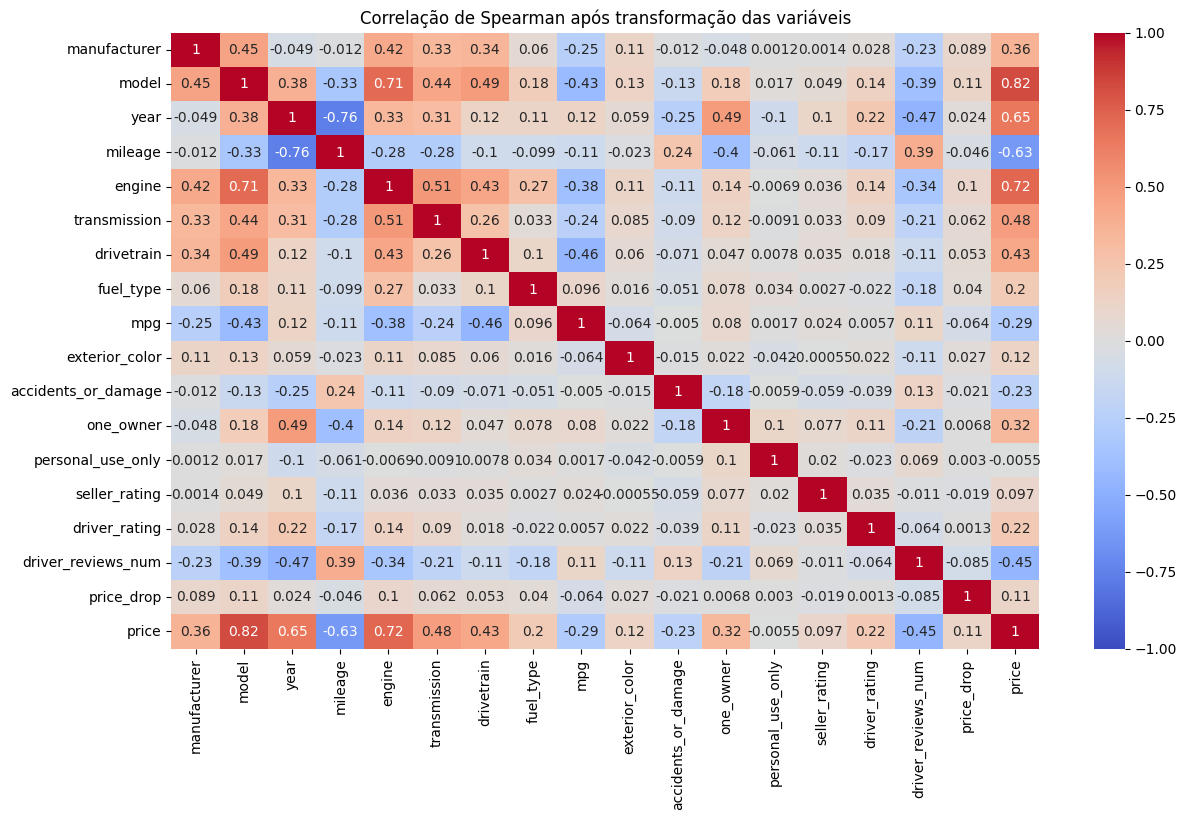

In [128]:
plt.figure(figsize=(14,8))
sns.heatmap(sample.corr(method='spearman'), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1);
plt.title("Correlação de Spearman após transformação das variáveis")
plt.show()

### Verificando importância de variáveis com o Random Forest 

O RandomForest atribui importância á variáveis através da **diminuição do Gini impurity score**, que mede o quanto cada variável contribui para reduzir a impureza ao longo das divisões das árvores.

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
sample_copy = sample.copy()
X = sample_copy.drop(columns=['price'])
y = sample['price']

rf = RandomForestRegressor(n_estimators=100,
                           random_state=1)

In [135]:
rf.fit(X, y)

RandomForestRegressor(random_state=1)

In [136]:
importances = rf.feature_importances_
importances

array([0.01138819, 0.64579694, 0.10572906, 0.10168087, 0.0439254 ,
       0.00627175, 0.00619349, 0.00318597, 0.01365056, 0.00386193,
       0.00140053, 0.00109911, 0.00119052, 0.00625194, 0.00891583,
       0.03422482, 0.00523311])

In [137]:
X.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop'],
      dtype='object')

Criando um dataframe com as **Features** e as **Importances** obtidas no treinamento

In [138]:
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

In [139]:
importances_df

Feature  Importance
0          manufacturer    0.011388
1                 model    0.645797
2                  year    0.105729
3               mileage    0.101681
4                engine    0.043925
5          transmission    0.006272
6            drivetrain    0.006193
7             fuel_type    0.003186
8                   mpg    0.013651
9        exterior_color    0.003862
10  accidents_or_damage    0.001401
11            one_owner    0.001099
12    personal_use_only    0.001191
13        seller_rating    0.006252
14        driver_rating    0.008916
15   driver_reviews_num    0.034225
16           price_drop    0.005233

In [140]:
importances_df = importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [141]:
importances_df

Feature  Importance
0                 model    0.645797
1                  year    0.105729
2               mileage    0.101681
3                engine    0.043925
4    driver_reviews_num    0.034225
5                   mpg    0.013651
6          manufacturer    0.011388
7         driver_rating    0.008916
8          transmission    0.006272
9         seller_rating    0.006252
10           drivetrain    0.006193
11           price_drop    0.005233
12       exterior_color    0.003862
13            fuel_type    0.003186
14  accidents_or_damage    0.001401
15    personal_use_only    0.001191
16            one_owner    0.001099

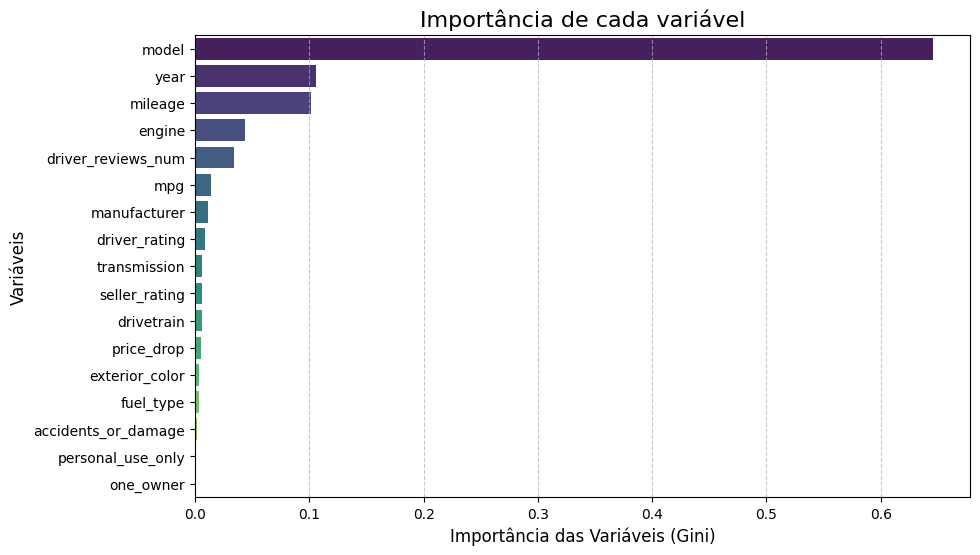

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis', hue='Feature')
plt.xlabel("Importância das Variáveis (Gini)", fontsize=12)
plt.ylabel("Variáveis", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.title("Importância de cada variável", fontsize=16)
plt.show()

É possível visualizar através do gráfico que existem diferentes níveis de importância das variáveis, sendo a variável *model* disparada a com maior importância.<br>

Observa-se que muitas variáveis possuem um nível de importância muito baixo também. Portanto, resolvi adotar como critério utilizar apenas as variáveis com o **nível de importância maior que 0.01**. Isso para reduzir a dimensionalidade e complexidade do modelo, além de melhorar sua interpretabilidade.

In [143]:
selected_vars = importances_df[importances_df['Importance'] >= 0.01]

Variáveis que usaremos como **preditoras** no treinamento do modelo

In [144]:
selected_vars

Feature  Importance
0               model    0.645797
1                year    0.105729
2             mileage    0.101681
3              engine    0.043925
4  driver_reviews_num    0.034225
5                 mpg    0.013651
6        manufacturer    0.011388

# Criação dos modelos de regressão

## Dividindo a sample em treino e teste

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X = sample[['model', 'year', 'mileage', 'engine', 'driver_reviews_num', 'mpg', 'manufacturer']]
y = sample['price']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Tamanho de **X_train** e **X_test**

In [148]:
X_train.shape, X_test.shape

((125532, 7), (53800, 7))

Tamanho de **y_train** e **y_test**

In [149]:
y_train.shape, y_test.shape

((125532,), (53800,))

## Normalizando os dados

Fazendo a normalização após a divisão dos dados para evitar leak de dados sobre o conjunto de testes para o conjunto de treinamento. Dessa forma, evita-se resultados irreais no treinamento do modelo.

### Standard Scaler

O StandardScaler transforma os dados de maneira que eles tenham média 0 e desvio padrão 1, padronizando as variáveis de entrada.<br>

Escolhi testá-lo porque ele funciona bem em distribuições **aproximadamente normais** e ajuda a evitar problemas de coeficientes desbalanceados em features com escalas muito diferentes.

### Min-Max Scaler

O Min-Max atua sobre as colunas que estamos pré-processando. Ele dimensiona o conjunto de dados de modo que todos os valores de recursos estejam no **intervalo [0, 1]**.<br>

Por debaixo dos panos, ele basicamente funciona subtraindo o valor em questão pelo **menor valor da coluna** e então divide pela diferença entre o **valor máximo e mínimo**.

Como ele é uma técnica que funciona melhor em **distribuições não normais**, escolhi testá-lo.

### Utilizando o Min-Max Scaler

In [229]:
from sklearn.preprocessing import MinMaxScaler

In [230]:
mm_scaler = MinMaxScaler()

Escalando **X_train** e **X_test** com MinMaxScaler

In [231]:
X_train_mm_scaler = mm_scaler.fit_transform(X_train)

In [232]:
X_train_mm_scaler

array([[0.64296767, 0.82608696, 0.03878409, ..., 0.24487805, 0.16078431,
        0.36972522],
       [0.45623053, 0.86956522, 0.02499314, ..., 0.01853659, 0.18823529,
        0.9823842 ],
       [0.19103002, 0.7826087 , 0.05414421, ..., 0.19902439, 0.20392157,
        0.45076602],
       ...,
       [0.27375026, 0.43478261, 0.0436015 , ..., 0.14536585, 0.19607843,
        0.41045434],
       [0.46537119, 0.86956522, 0.06167817, ..., 0.00195122, 0.18823529,
        0.15380741],
       [0.39555756, 0.95652174, 0.00813177, ..., 0.00390244, 0.18823529,
        0.14166672]], shape=(125532, 7))

In [233]:
X_test_mm_scaler = mm_scaler.fit_transform(X_test)

In [234]:
X_test_mm_scaler

array([[0.12248649, 0.65217391, 0.05805879, ..., 0.02341463, 0.2       ,
        0.56120284],
       [0.03419785, 0.7826087 , 0.03413956, ..., 0.19707317, 0.2745098 ,
        0.45076602],
       [0.10498466, 0.69565217, 0.04425542, ..., 0.32878049, 0.21568627,
        0.14166672],
       ...,
       [0.15953688, 0.73913043, 0.05983058, ..., 0.06536585, 0.18823529,
        0.41045434],
       [0.61538052, 0.95652174, 0.00939414, ..., 0.00292683, 0.18823529,
        0.68496113],
       [0.14937196, 0.60869565, 0.12597864, ..., 0.06731707, 0.17647059,
        0.56120284]], shape=(53800, 7))

### Utilizando o StandardScaler

In [235]:
from sklearn.preprocessing import StandardScaler

In [236]:
sc_scaler = StandardScaler()

Escalando **X_train** e **X_test** com StandardScaler

In [237]:
X_train_sc_scaler = sc_scaler.fit_transform(X_train)
X_test_sc_scaler = sc_scaler.fit_transform(X_test)

In [238]:
X_train_sc_scaler

array([[ 1.63036464,  0.27946122, -0.32764798, ...,  1.33401829,
        -0.73687264, -0.13143874],
       [ 0.57746819,  0.54166721, -0.68531222, ..., -0.64518589,
        -0.13383484,  2.78580216],
       [-0.91783518,  0.01725523,  0.07071207, ...,  0.93305883,
         0.21075818,  0.25444567],
       ...,
       [-0.45142638, -2.0803927 , -0.20270999, ...,  0.46385094,
         0.03846167,  0.06249731],
       [ 0.62900677,  0.54166721,  0.26610294, ..., -0.79021378,
        -0.13383484, -1.15955437],
       [ 0.23537044,  1.0660792 , -1.12260675, ..., -0.77315168,
        -0.13383484, -1.21736357]], shape=(125532, 7))

In [239]:
X_test_sc_scaler

array([[-1.31240404, -0.76473491, -0.07064052, ..., -0.60570405,
         0.13116686,  0.77373663],
       [-1.81048191,  0.01753566, -0.58828322, ...,  0.93955024,
         1.7788524 ,  0.24903707],
       [-1.41114011, -0.50397805, -0.36936306, ...,  2.11151276,
         0.47804802, -1.21953367],
       ...,
       [-1.10338528, -0.2432212 , -0.03229662, ..., -0.23241229,
        -0.12899402,  0.05751106],
       [ 1.46824377,  1.06056307, -1.12380589, ..., -0.78800933,
        -0.12899402,  1.36172828],
       [-1.16073039, -1.02549176,  1.39923218, ..., -0.21504988,
        -0.38915489,  0.77373663]], shape=(53800, 7))

## Treinamento com o Random Forest

### Sem utilização de scaler

In [331]:
rf2 = RandomForestRegressor(n_estimators=100, random_state=1, verbose=2)

In [332]:
rf2.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   21.7s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

RandomForestRegressor(random_state=1, verbose=2)

In [333]:
y_pred = rf2.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s


In [334]:
y_pred

array([21990.5 , 15577.82, 16021.18, ..., 16748.09, 48467.14, 14257.3 ],
      shape=(53800,))

In [335]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [336]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.3f}".format(mae))

MAE: 2325.619


In [337]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))

MSE: 11177934.274
RMSE: 3343.342


In [338]:
rf2.score(X_test, y_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.9s


0.9382271636229104

### Utilizando o StandardScaler

In [339]:
rf2.fit(X_train_sc_scaler, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   20.9s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

RandomForestRegressor(random_state=1, verbose=2)

In [340]:
y_pred_sc_scaler = rf2.predict(X_test_sc_scaler)
y_pred_sc_scaler

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.9s


array([21953.33, 15857.87, 15870.82, ..., 16834.62, 57303.04, 14600.68],
      shape=(53800,))

In [341]:
mae_sc_scaler = mean_absolute_error(y_test, y_pred_sc_scaler)
print("MAE: {:.3f}".format(mae_sc_scaler))

MAE: 2500.514


In [342]:
mse_sc_scaler = mean_squared_error(y_test, y_pred_sc_scaler)
rmse_sc_scaler = mse_sc_scaler ** 0.5
print("MSE: {:.3f}".format(mse_sc_scaler))
print("RMSE: {:.3f}".format(rmse_sc_scaler))

MSE: 12783829.117
RMSE: 3575.448


### Utilizando Min-Max Scaler

In [343]:
rf2.fit(X_train_mm_scaler, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   20.7s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

RandomForestRegressor(random_state=1, verbose=2)

In [344]:
y_pred_mm_scaler = rf2.predict(X_test_mm_scaler)
y_pred_mm_scaler

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.1s


array([21265.19, 15925.81, 17847.09, ..., 16472.71, 45358.93, 13816.34],
      shape=(53800,))

In [345]:
mae_mm_scaler = mean_absolute_error(y_test, y_pred_mm_scaler)
print("MAE: {:.3f}".format(mae_mm_scaler))

MAE: 2496.358


In [346]:
mse_mm_scaler = mean_squared_error(y_test, y_pred)
rmse_mm_scaler = mse ** 0.5
print("MSE: {:.3f}".format(mse_mm_scaler))
print("RMSE: {:.3f}".format(rmse_mm_scaler))

MSE: 11177934.274
RMSE: 3343.342


### Comparando as métricas

In [347]:
metrics_data = {
    "Scalers": ['Nenhum', 'StandardScaler', 'Min-Max Scaler'],
    "MAE": [mae, mae_sc_scaler, mae_mm_scaler],
    "RMSE": [rmse, rmse_sc_scaler, rmse_mm_scaler]
}

Criando um dataframe com as métricas obtidas em cada teste

In [348]:
metrics_df = pd.DataFrame(metrics_data)
metrics_df

Scalers          MAE         RMSE
0          Nenhum  2325.618961  3343.341782
1  StandardScaler  2500.514208  3575.448100
2  Min-Max Scaler  2496.358487  3343.341782

In [349]:
df_melted = metrics_df.melt(id_vars="Scalers", var_name="Métrica", value_name="Valor")

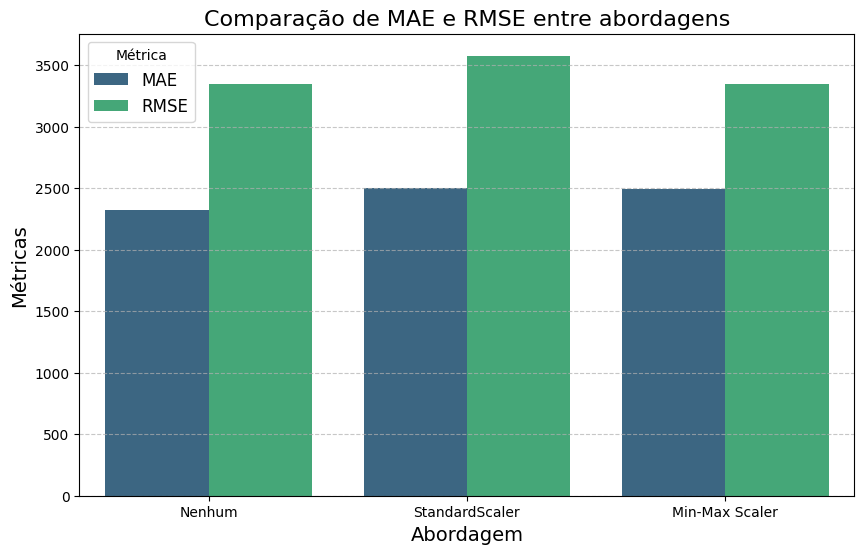

In [350]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Scalers", y="Valor", hue="Métrica", palette="viridis")

plt.title("Comparação de MAE e RMSE entre abordagens", fontsize=16)
plt.xlabel("Abordagem", fontsize=14)
plt.ylabel("Métricas", fontsize=14)
plt.legend(title="Métrica", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Com o gráfico comparativo acima, é notório que a não utilização de formas de normalização dos dados nos proporcionou melhores resultados tanto da métrica **MAE** quanto **RMSE**.

Isso pode ser explicado pois algoritmos baseados em árvores de decisão são invariantes a transformações de escala. Isso ocorre porque eles tomam decisões com base em divisões binárias (thresholds) que são independentes de como as variáveis estão escaladas.

## Treinamento com LightGBM

In [9]:
from lightgbm.sklearn import LGBMRegressor

In [352]:
lgbm = LGBMRegressor(
    boosting_type='gbdt',      
    n_estimators=500,      
    random_state=42        
    )

In [353]:
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185


/home/matsa/miniconda3/envs/project2.1/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(n_estimators=500, random_state=42)

In [354]:
y_pred = lgbm.predict(X_test)
y_pred

array([20752.4121554 , 16762.64526247, 16333.04887752, ...,
       18649.78056134, 49003.51001138, 16372.25455868], shape=(53800,))

In [355]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.3f}".format(mae))

MAE: 2316.783


In [356]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))

MSE: 10743943.085
RMSE: 3277.795


### Utilizando StandardScaler

In [357]:
lgbm.fit(X_train_sc_scaler, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185


/home/matsa/miniconda3/envs/project2.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/matsa/miniconda3/envs/project2.1/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(n_estimators=500, random_state=42)

In [358]:
y_pred_sc_scaler = lgbm.predict(X_test_sc_scaler)
y_pred_sc_scaler

/home/matsa/miniconda3/envs/project2.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([23383.56654966, 16354.96402688, 16574.40188431, ...,
       18716.51658338, 55095.42937416, 18585.01431815], shape=(53800,))

In [359]:
mae_sc_scaler = mean_absolute_error(y_test, y_pred_sc_scaler)
print("MAE: {:.3f}".format(mae_sc_scaler))

MAE: 2561.524


In [360]:
mse_sc_scaler = mean_squared_error(y_test, y_pred_sc_scaler)
rmse_sc_scaler = mse_sc_scaler ** 0.5
print("MSE: {:.3f}".format(mse_sc_scaler))
print("RMSE: {:.3f}".format(rmse_sc_scaler))

MSE: 13023691.957
RMSE: 3608.835


### Utilizando Min-Max Scaler

In [361]:
lgbm.fit(X_train_mm_scaler, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185


/home/matsa/miniconda3/envs/project2.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/matsa/miniconda3/envs/project2.1/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(n_estimators=500, random_state=42)

In [362]:
y_pred_mm_scaler = lgbm.predict(X_test_mm_scaler)
y_pred_mm_scaler

/home/matsa/miniconda3/envs/project2.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([19656.20318087, 16443.69284251, 16637.95968906, ...,
       18258.81186368, 48894.39357958, 15259.62408118], shape=(53800,))

In [363]:
mae_mm_scaler = mean_absolute_error(y_test, y_pred)
print("MAE: {:.3f}".format(mae_mm_scaler))

MAE: 2316.783


In [364]:
mse_mm_scaler = mean_squared_error(y_test, y_pred)
rmse_mm_scaler = mse_mm_scaler ** 0.5
print("MSE: {:.3f}".format(mse_mm_scaler))
print("RMSE: {:.3f}".format(rmse_mm_scaler))

MSE: 10743943.085
RMSE: 3277.795


### Comparando as métricas

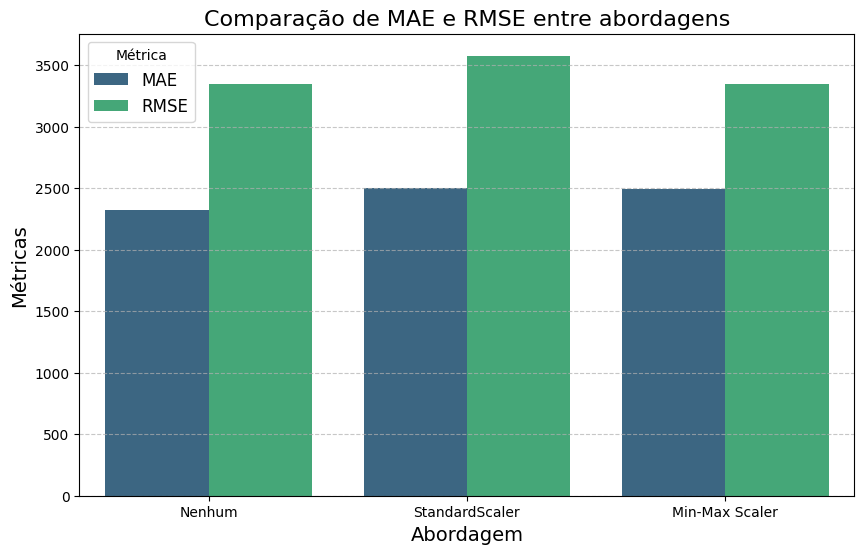

In [365]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Scalers", y="Valor", hue="Métrica", palette="viridis")

plt.title("Comparação de MAE e RMSE entre abordagens", fontsize=16)
plt.xlabel("Abordagem", fontsize=14)
plt.ylabel("Métricas", fontsize=14)
plt.legend(title="Métrica", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Algoritmos Gradient Boosting também são baseados em árvores, portanto era esperado que não escalar os dados traria melhores resultados.

Os dois modelos estão bem parecidos em questão de resultados, portanto é interessante realizar o Tuning de hiperparâmetros para visualizar qual será o melhor modelo.

# Tuning de hiperparâmetros

Para fazer o Tuning de hiperparâmetros, eu resolvi seguir a recomendação do Vinicius e utilizar o **Optuna**, que é um framework de otimização de hiperparâmetros.

Para utilizar o Optuna, é necessário definir uma função de **objetivo** e dentro dessa função é necessário sugerir valores de hiperparâmetros utilizando o **trial**. Na mesma função o modelo é declarado e por fim, um objeto **study** é criado para invocar a função de otimização.

In [5]:
import sklearn
import optuna

/home/matsa/miniconda3/envs/project2.1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Tuning do RandomForest

In [165]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    rf_tunned = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split)
    rf_tunned.fit(X_train, y_train)

    y_pred = rf_tunned.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

Orientando o **study** a minimizar o **mae**

In [166]:
study = optuna.create_study(direction="minimize")

[I 2025-01-25 14:24:11,264] A new study created in memory with name: no-name-de972089-c3a7-4f28-80f9-85c57987d342


In [167]:
study.optimize(objective, n_trials=50)

[I 2025-01-25 14:24:58,840] Trial 0 finished with value: 2299.257153687108 and parameters: {'n_estimators': 97, 'max_depth': 32, 'min_samples_split': 4}. Best is trial 0 with value: 2299.257153687108.
[I 2025-01-25 14:25:35,939] Trial 1 finished with value: 3502.5025407683816 and parameters: {'n_estimators': 174, 'max_depth': 7, 'min_samples_split': 7}. Best is trial 0 with value: 2299.257153687108.
[I 2025-01-25 14:26:47,069] Trial 2 finished with value: 2279.3133708339515 and parameters: {'n_estimators': 158, 'max_depth': 37, 'min_samples_split': 8}. Best is trial 2 with value: 2279.3133708339515.
[I 2025-01-25 14:27:24,344] Trial 3 finished with value: 2286.7865149751115 and parameters: {'n_estimators': 87, 'max_depth': 45, 'min_samples_split': 9}. Best is trial 2 with value: 2279.3133708339515.
[I 2025-01-25 14:28:42,144] Trial 4 finished with value: 2280.421593188911 and parameters: {'n_estimators': 179, 'max_depth': 27, 'min_samples_split': 9}. Best is trial 2 with value: 2279.31

In [168]:
study.best_params

{'n_estimators': 172, 'max_depth': 28, 'min_samples_split': 8}

Melhor valor encontrado de **MAE** para o **Random Forest**

In [169]:
study.best_value

2277.2507555832417

## Tuning do LightGBM

In [6]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 200, 800)
    num_leaves = trial.suggest_int("num_leaves", 20, 150)
    max_depth = trial.suggest_int("max_depth", 3, 12)
    min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 10, 500)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
    
    lgbm_tunned = LGBMRegressor(n_estimators=n_estimators, 
                                num_leaves=num_leaves, 
                                max_depth=max_depth, 
                                min_data_in_leaf=min_data_in_leaf, 
                                learning_rate=learning_rate)

    lgbm_tunned.fit(X_train, y_train)

    y_pred = lgbm_tunned.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

In [158]:
study = optuna.create_study(direction="minimize")

[I 2025-01-25 14:10:34,650] A new study created in memory with name: no-name-ab00c0b7-e2ea-400c-a6af-f5a1b645ef8e


In [159]:
study.optimize(objective, n_trials=100)

[LightGBM] [Warning] min_data_in_leaf is set=324, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=324
[LightGBM] [Warning] min_data_in_leaf is set=324, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:10:35,689] Trial 0 finished with value: 2901.223108360426 and parameters: {'n_estimators': 285, 'num_leaves': 90, 'max_depth': 5, 'min_data_in_leaf': 324, 'learning_rate': 0.033239359428869984}. Best is trial 0 with value: 2901.223108360426.


[LightGBM] [Warning] min_data_in_leaf is set=481, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=481
[LightGBM] [Warning] min_data_in_leaf is set=481, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:10:36,848] Trial 1 finished with value: 2501.388960984986 and parameters: {'n_estimators': 584, 'num_leaves': 49, 'max_depth': 5, 'min_data_in_leaf': 481, 'learning_rate': 0.14465184840684914}. Best is trial 1 with value: 2501.388960984986.


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


[I 2025-01-25 14:10:38,596] Trial 2 finished with value: 2483.430825521645 and parameters: {'n_estimators': 621, 'num_leaves': 42, 'max_depth': 11, 'min_data_in_leaf': 60, 'learning_rate': 0.03000483192871509}. Best is trial 2 with value: 2483.430825521645.


[LightGBM] [Warning] min_data_in_leaf is set=203, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=203
[LightGBM] [Warning] min_data_in_leaf is set=203, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=203
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2025-01-25 14:10:39,354] Trial 3 finished with value: 2672.63417604203 and parameters: {'n_estimators': 436, 'num_leaves': 73, 'max_depth': 4, 'min_data_in_leaf': 203, 'learning_rate': 0.09729513878544112}. Best is trial 2 with value: 2483.430825521645.


[LightGBM] [Warning] min_data_in_leaf is set=403, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=403
[LightGBM] [Warning] min_data_in_leaf is set=403, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:10:41,239] Trial 4 finished with value: 2554.927515833764 and parameters: {'n_estimators': 742, 'num_leaves': 32, 'max_depth': 8, 'min_data_in_leaf': 403, 'learning_rate': 0.03431249768492389}. Best is trial 2 with value: 2483.430825521645.


[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:10:43,685] Trial 5 finished with value: 2322.070270752677 and parameters: {'n_estimators': 598, 'num_leaves': 119, 'max_depth': 9, 'min_data_in_leaf': 128, 'learning_rate': 0.03624910580553042}. Best is trial 5 with value: 2322.070270752677.


[LightGBM] [Warning] min_data_in_leaf is set=208, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=208
[LightGBM] [Warning] min_data_in_leaf is set=208, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:10:44,837] Trial 6 finished with value: 2469.2787569093957 and parameters: {'n_estimators': 603, 'num_leaves': 86, 'max_depth': 4, 'min_data_in_leaf': 208, 'learning_rate': 0.19267776805638728}. Best is trial 5 with value: 2322.070270752677.


[LightGBM] [Warning] min_data_in_leaf is set=174, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=174
[LightGBM] [Warning] min_data_in_leaf is set=174, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:10:46,760] Trial 7 finished with value: 2254.793568923102 and parameters: {'n_estimators': 560, 'num_leaves': 67, 'max_depth': 11, 'min_data_in_leaf': 174, 'learning_rate': 0.07337059146086318}. Best is trial 7 with value: 2254.793568923102.


[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:10:48,268] Trial 8 finished with value: 2127.2102946080963 and parameters: {'n_estimators': 386, 'num_leaves': 130, 'max_depth': 10, 'min_data_in_leaf': 17, 'learning_rate': 0.15734673861856235}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=437, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=437
[LightGBM] [Warning] min_data_in_leaf is set=437, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=437
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:10:50,286] Trial 9 finished with value: 2727.009827387991 and parameters: {'n_estimators': 575, 'num_leaves': 42, 'max_depth': 10, 'min_data_in_leaf': 437, 'learning_rate': 0.01568857699261197}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:10:51,123] Trial 10 finished with value: 2234.0411870117937 and parameters: {'n_estimators': 205, 'num_leaves': 146, 'max_depth': 7, 'min_data_in_leaf': 10, 'learning_rate': 0.23637179925277357}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2025-01-25 14:10:51,865] Trial 11 finished with value: 2224.8265071306355 and parameters: {'n_estimators': 205, 'num_leaves': 150, 'max_depth': 7, 'min_data_in_leaf': 26, 'learning_rate': 0.28987388717006835}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:10:52,970] Trial 12 finished with value: 2220.355425504871 and parameters: {'n_estimators': 382, 'num_leaves': 149, 'max_depth': 7, 'min_data_in_leaf': 90, 'learning_rate': 0.2685279066233031}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=101, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=101
[LightGBM] [Warning] min_data_in_leaf is set=101, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:10:54,448] Trial 13 finished with value: 2198.3995763470994 and parameters: {'n_estimators': 391, 'num_leaves': 123, 'max_depth': 9, 'min_data_in_leaf': 101, 'learning_rate': 0.1253755189013891}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295
[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2025-01-25 14:10:56,017] Trial 14 finished with value: 2268.578276137019 and parameters: {'n_estimators': 361, 'num_leaves': 117, 'max_depth': 12, 'min_data_in_leaf': 295, 'learning_rate': 0.11953139609740869}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:10:57,991] Trial 15 finished with value: 2271.7032671744428 and parameters: {'n_estimators': 472, 'num_leaves': 118, 'max_depth': 9, 'min_data_in_leaf': 116, 'learning_rate': 0.06006300157084488}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=147, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=147
[LightGBM] [Warning] min_data_in_leaf is set=147, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=147
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:10:59,298] Trial 16 finished with value: 2227.3052302280253 and parameters: {'n_estimators': 329, 'num_leaves': 130, 'max_depth': 9, 'min_data_in_leaf': 147, 'learning_rate': 0.15994802009403658}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2025-01-25 14:11:01,136] Trial 17 finished with value: 2173.9633739278897 and parameters: {'n_estimators': 421, 'num_leaves': 100, 'max_depth': 12, 'min_data_in_leaf': 77, 'learning_rate': 0.09355920598955302}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=258, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=258
[LightGBM] [Warning] min_data_in_leaf is set=258, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:11:03,523] Trial 18 finished with value: 2242.7185521307065 and parameters: {'n_estimators': 500, 'num_leaves': 103, 'max_depth': 12, 'min_data_in_leaf': 258, 'learning_rate': 0.08774842937974954}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:04,908] Trial 19 finished with value: 2331.6003583001634 and parameters: {'n_estimators': 274, 'num_leaves': 101, 'max_depth': 11, 'min_data_in_leaf': 57, 'learning_rate': 0.05466210085462354}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52


[I 2025-01-25 14:11:07,548] Trial 20 finished with value: 2448.760585211415 and parameters: {'n_estimators': 433, 'num_leaves': 134, 'max_depth': 12, 'min_data_in_leaf': 52, 'learning_rate': 0.016586730470810385}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:09,393] Trial 21 finished with value: 2184.069973411217 and parameters: {'n_estimators': 404, 'num_leaves': 104, 'max_depth': 10, 'min_data_in_leaf': 85, 'learning_rate': 0.1115431299456604}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


[I 2025-01-25 14:11:10,655] Trial 22 finished with value: 2156.103122555604 and parameters: {'n_estimators': 306, 'num_leaves': 104, 'max_depth': 10, 'min_data_in_leaf': 10, 'learning_rate': 0.1794620508582697}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12


[I 2025-01-25 14:11:11,713] Trial 23 finished with value: 2181.9170089267495 and parameters: {'n_estimators': 304, 'num_leaves': 72, 'max_depth': 10, 'min_data_in_leaf': 12, 'learning_rate': 0.1873351765156887}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2025-01-25 14:11:12,917] Trial 24 finished with value: 2165.7307438603425 and parameters: {'n_estimators': 244, 'num_leaves': 107, 'max_depth': 11, 'min_data_in_leaf': 48, 'learning_rate': 0.20291886351616512}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=163, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=163
[LightGBM] [Warning] min_data_in_leaf is set=163, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=163
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:11:13,841] Trial 25 finished with value: 2288.980257900211 and parameters: {'n_estimators': 239, 'num_leaves': 135, 'max_depth': 8, 'min_data_in_leaf': 163, 'learning_rate': 0.20732067104427113}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:15,510] Trial 26 finished with value: 2145.224397189334 and parameters: {'n_estimators': 342, 'num_leaves': 111, 'max_depth': 10, 'min_data_in_leaf': 39, 'learning_rate': 0.16587142091273543}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33


[I 2025-01-25 14:11:18,620] Trial 27 finished with value: 2586.0138185401265 and parameters: {'n_estimators': 504, 'num_leaves': 110, 'max_depth': 10, 'min_data_in_leaf': 33, 'learning_rate': 0.011073392245829119}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=359, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=359
[LightGBM] [Warning] min_data_in_leaf is set=359, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:11:19,907] Trial 28 finished with value: 2365.8229499843533 and parameters: {'n_estimators': 341, 'num_leaves': 95, 'max_depth': 8, 'min_data_in_leaf': 359, 'learning_rate': 0.1540728110675635}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=227, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=227
[LightGBM] [Warning] min_data_in_leaf is set=227, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=227
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:11:20,868] Trial 29 finished with value: 2603.7081189934456 and parameters: {'n_estimators': 299, 'num_leaves': 80, 'max_depth': 6, 'min_data_in_leaf': 227, 'learning_rate': 0.0626913515704491}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=114, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=114
[LightGBM] [Warning] min_data_in_leaf is set=114, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=114
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:11:22,226] Trial 30 finished with value: 2195.4967596216707 and parameters: {'n_estimators': 262, 'num_leaves': 127, 'max_depth': 10, 'min_data_in_leaf': 114, 'learning_rate': 0.29445291783933875}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:23,675] Trial 31 finished with value: 2153.5493256255413 and parameters: {'n_estimators': 328, 'num_leaves': 110, 'max_depth': 11, 'min_data_in_leaf': 42, 'learning_rate': 0.17100246143524298}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:25,157] Trial 32 finished with value: 2155.4017714312945 and parameters: {'n_estimators': 324, 'num_leaves': 114, 'max_depth': 11, 'min_data_in_leaf': 43, 'learning_rate': 0.14927730366308092}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:26,851] Trial 33 finished with value: 2161.0316287949054 and parameters: {'n_estimators': 354, 'num_leaves': 113, 'max_depth': 11, 'min_data_in_leaf': 68, 'learning_rate': 0.13592471046570997}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=145, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=145
[LightGBM] [Warning] min_data_in_leaf is set=145, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=145
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:11:29,167] Trial 34 finished with value: 2162.263849977144 and parameters: {'n_estimators': 464, 'num_leaves': 140, 'max_depth': 11, 'min_data_in_leaf': 145, 'learning_rate': 0.14942159398055213}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45


[I 2025-01-25 14:11:30,448] Trial 35 finished with value: 2152.686769353712 and parameters: {'n_estimators': 335, 'num_leaves': 90, 'max_depth': 12, 'min_data_in_leaf': 45, 'learning_rate': 0.2353851445594897}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:33,542] Trial 36 finished with value: 2142.4779185514053 and parameters: {'n_estimators': 732, 'num_leaves': 90, 'max_depth': 12, 'min_data_in_leaf': 77, 'learning_rate': 0.2380092792579355}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81


[I 2025-01-25 14:11:35,971] Trial 37 finished with value: 2139.276100454577 and parameters: {'n_estimators': 774, 'num_leaves': 59, 'max_depth': 12, 'min_data_in_leaf': 81, 'learning_rate': 0.25491358416279886}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=496, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=496
[LightGBM] [Warning] min_data_in_leaf is set=496, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=496
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:11:39,092] Trial 38 finished with value: 2191.2022005435388 and parameters: {'n_estimators': 795, 'num_leaves': 52, 'max_depth': 12, 'min_data_in_leaf': 496, 'learning_rate': 0.23413817449855512}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:11:40,383] Trial 39 finished with value: 2579.0978053628833 and parameters: {'n_estimators': 691, 'num_leaves': 55, 'max_depth': 3, 'min_data_in_leaf': 200, 'learning_rate': 0.23929787702171462}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=136, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=136
[LightGBM] [Warning] min_data_in_leaf is set=136, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_i

[I 2025-01-25 14:11:42,090] Trial 40 finished with value: 2300.4347695920223 and parameters: {'n_estimators': 667, 'num_leaves': 27, 'max_depth': 9, 'min_data_in_leaf': 136, 'learning_rate': 0.1095102453974972}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:45,572] Trial 41 finished with value: 2141.5644844051553 and parameters: {'n_estimators': 800, 'num_leaves': 90, 'max_depth': 12, 'min_data_in_leaf': 79, 'learning_rate': 0.2327622921509612}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:48,234] Trial 42 finished with value: 2134.457843321377 and parameters: {'n_estimators': 795, 'num_leaves': 62, 'max_depth': 12, 'min_data_in_leaf': 89, 'learning_rate': 0.21011380557445625}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:51,122] Trial 43 finished with value: 2143.507549097318 and parameters: {'n_estimators': 779, 'num_leaves': 66, 'max_depth': 12, 'min_data_in_leaf': 87, 'learning_rate': 0.25963025956857566}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=178, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=178
[LightGBM] [Warning] min_data_in_leaf is set=178, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:11:54,210] Trial 44 finished with value: 2147.8341579936537 and parameters: {'n_estimators': 745, 'num_leaves': 63, 'max_depth': 12, 'min_data_in_leaf': 178, 'learning_rate': 0.2109353508755318}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111


[I 2025-01-25 14:11:56,435] Trial 45 finished with value: 2156.2209932651854 and parameters: {'n_estimators': 742, 'num_leaves': 44, 'max_depth': 11, 'min_data_in_leaf': 111, 'learning_rate': 0.29885820151568027}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:11:59,588] Trial 46 finished with value: 2219.8773898051013 and parameters: {'n_estimators': 698, 'num_leaves': 80, 'max_depth': 12, 'min_data_in_leaf': 71, 'learning_rate': 0.045672721869047576}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105
[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:12:02,668] Trial 47 finished with value: 2405.7696436214756 and parameters: {'n_estimators': 760, 'num_leaves': 61, 'max_depth': 11, 'min_data_in_leaf': 105, 'learning_rate': 0.023400505629315553}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128


[I 2025-01-25 14:12:04,522] Trial 48 finished with value: 2185.2170833784808 and parameters: {'n_estimators': 711, 'num_leaves': 33, 'max_depth': 12, 'min_data_in_leaf': 128, 'learning_rate': 0.2151916273647565}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=458, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=458
[LightGBM] [Warning] min_data_in_leaf is set=458, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2025-01-25 14:12:06,234] Trial 49 finished with value: 2498.1999152475228 and parameters: {'n_estimators': 648, 'num_leaves': 75, 'max_depth': 6, 'min_data_in_leaf': 458, 'learning_rate': 0.0830075255631465}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=348, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=348
[LightGBM] [Warning] min_data_in_leaf is set=348, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=348
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:12:09,690] Trial 50 finished with value: 2168.611903706453 and parameters: {'n_estimators': 791, 'num_leaves': 86, 'max_depth': 11, 'min_data_in_leaf': 348, 'learning_rate': 0.27190919997730084}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2025-01-25 14:12:12,626] Trial 51 finished with value: 2138.9840356968575 and parameters: {'n_estimators': 772, 'num_leaves': 68, 'max_depth': 12, 'min_data_in_leaf': 84, 'learning_rate': 0.2585914136031077}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91


[I 2025-01-25 14:12:14,878] Trial 52 finished with value: 2146.4457045469576 and parameters: {'n_estimators': 720, 'num_leaves': 56, 'max_depth': 12, 'min_data_in_leaf': 91, 'learning_rate': 0.24072348655394285}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71


[I 2025-01-25 14:12:17,154] Trial 53 finished with value: 2139.8598506563894 and parameters: {'n_estimators': 770, 'num_leaves': 46, 'max_depth': 12, 'min_data_in_leaf': 71, 'learning_rate': 0.18664016905201894}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26


[I 2025-01-25 14:12:19,130] Trial 54 finished with value: 2143.5799267054826 and parameters: {'n_estimators': 767, 'num_leaves': 47, 'max_depth': 11, 'min_data_in_leaf': 26, 'learning_rate': 0.13125548533491382}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=165, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=165
[LightGBM] [Warning] min_data_in_leaf is set=165, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=165
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=165, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=165


[I 2025-01-25 14:12:20,535] Trial 55 finished with value: 2218.605176146075 and parameters: {'n_estimators': 537, 'num_leaves': 35, 'max_depth': 12, 'min_data_in_leaf': 165, 'learning_rate': 0.19179973248506896}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99


[I 2025-01-25 14:12:22,602] Trial 56 finished with value: 2154.4446133331967 and parameters: {'n_estimators': 800, 'num_leaves': 39, 'max_depth': 12, 'min_data_in_leaf': 99, 'learning_rate': 0.18212756918271836}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2025-01-25 14:12:25,528] Trial 57 finished with value: 2139.938160328629 and parameters: {'n_estimators': 756, 'num_leaves': 70, 'max_depth': 11, 'min_data_in_leaf': 67, 'learning_rate': 0.10431931776078829}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:12:27,853] Trial 58 finished with value: 2149.143367076602 and parameters: {'n_estimators': 626, 'num_leaves': 72, 'max_depth': 11, 'min_data_in_leaf': 59, 'learning_rate': 0.11500342534960939}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18


[I 2025-01-25 14:12:30,301] Trial 59 finished with value: 2175.822477777513 and parameters: {'n_estimators': 768, 'num_leaves': 59, 'max_depth': 10, 'min_data_in_leaf': 18, 'learning_rate': 0.07536832633234519}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=286, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=286
[LightGBM] [Warning] min_data_in_leaf is set=286, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:12:33,226] Trial 60 finished with value: 2223.031958267285 and parameters: {'n_estimators': 682, 'num_leaves': 68, 'max_depth': 11, 'min_data_in_leaf': 286, 'learning_rate': 0.10334976343288889}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62


[I 2025-01-25 14:12:35,301] Trial 61 finished with value: 2149.4646171683867 and parameters: {'n_estimators': 747, 'num_leaves': 48, 'max_depth': 12, 'min_data_in_leaf': 62, 'learning_rate': 0.263522728113483}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=129, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=129
[LightGBM] [Warning] min_data_in_leaf is set=129, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:12:38,723] Trial 62 finished with value: 2128.7933294908134 and parameters: {'n_estimators': 776, 'num_leaves': 78, 'max_depth': 12, 'min_data_in_leaf': 129, 'learning_rate': 0.16812165171665283}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:12:41,781] Trial 63 finished with value: 2132.3669898448497 and parameters: {'n_estimators': 721, 'num_leaves': 79, 'max_depth': 11, 'min_data_in_leaf': 116, 'learning_rate': 0.1661452166223084}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=122, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=122
[LightGBM] [Warning] min_data_in_leaf is set=122, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:12:44,876] Trial 64 finished with value: 2133.673805030267 and parameters: {'n_estimators': 722, 'num_leaves': 78, 'max_depth': 12, 'min_data_in_leaf': 122, 'learning_rate': 0.16890478140772983}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=123, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=123
[LightGBM] [Warning] min_data_in_leaf is set=123, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:12:47,861] Trial 65 finished with value: 2138.2039085531683 and parameters: {'n_estimators': 720, 'num_leaves': 78, 'max_depth': 10, 'min_data_in_leaf': 123, 'learning_rate': 0.1666229012250129}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=129, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=129
[LightGBM] [Warning] min_data_in_leaf is set=129, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:12:50,964] Trial 66 finished with value: 2143.072195447592 and parameters: {'n_estimators': 723, 'num_leaves': 78, 'max_depth': 10, 'min_data_in_leaf': 129, 'learning_rate': 0.13683354659762953}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=153, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=153
[LightGBM] [Warning] min_data_in_leaf is set=153, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2025-01-25 14:12:53,454] Trial 67 finished with value: 2179.695708258464 and parameters: {'n_estimators': 665, 'num_leaves': 95, 'max_depth': 8, 'min_data_in_leaf': 153, 'learning_rate': 0.16430055895158902}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=186, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=186
[LightGBM] [Warning] min_data_in_leaf is set=186, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=186
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2025-01-25 14:12:55,987] Trial 68 finished with value: 2202.145843661974 and parameters: {'n_estimators': 624, 'num_leaves': 83, 'max_depth': 9, 'min_data_in_leaf': 186, 'learning_rate': 0.12466980208347472}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=225, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=225
[LightGBM] [Warning] min_data_in_leaf is set=225, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:12:58,901] Trial 69 finished with value: 2172.693569157149 and parameters: {'n_estimators': 705, 'num_leaves': 76, 'max_depth': 10, 'min_data_in_leaf': 225, 'learning_rate': 0.15057714662373145}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2025-01-25 14:13:02,118] Trial 70 finished with value: 2146.2884540316004 and parameters: {'n_estimators': 728, 'num_leaves': 96, 'max_depth': 9, 'min_data_in_leaf': 116, 'learning_rate': 0.1686649305842157}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2025-01-25 14:13:05,106] Trial 71 finished with value: 2133.7398733291225 and parameters: {'n_estimators': 780, 'num_leaves': 64, 'max_depth': 11, 'min_data_in_leaf': 99, 'learning_rate': 0.19471837363895814}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:13:08,131] Trial 72 finished with value: 2144.0266993660534 and parameters: {'n_estimators': 785, 'num_leaves': 64, 'max_depth': 10, 'min_data_in_leaf': 140, 'learning_rate': 0.20707407166021338}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:13:11,325] Trial 73 finished with value: 2135.9314429737165 and parameters: {'n_estimators': 739, 'num_leaves': 81, 'max_depth': 11, 'min_data_in_leaf': 120, 'learning_rate': 0.14450291833078063}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=162, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=162
[LightGBM] [Warning] min_data_in_leaf is set=162, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:13:14,397] Trial 74 finished with value: 2152.1042664276406 and parameters: {'n_estimators': 674, 'num_leaves': 84, 'max_depth': 11, 'min_data_in_leaf': 162, 'learning_rate': 0.1424125089827558}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=130, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=130
[LightGBM] [Warning] min_data_in_leaf is set=130, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:13:17,259] Trial 75 finished with value: 2148.814987995847 and parameters: {'n_estimators': 646, 'num_leaves': 86, 'max_depth': 11, 'min_data_in_leaf': 130, 'learning_rate': 0.12369405120258412}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:13:19,701] Trial 76 finished with value: 2150.6311762747823 and parameters: {'n_estimators': 592, 'num_leaves': 79, 'max_depth': 10, 'min_data_in_leaf': 119, 'learning_rate': 0.16839828395451198}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:13:22,512] Trial 77 finished with value: 2133.6772926772474 and parameters: {'n_estimators': 733, 'num_leaves': 72, 'max_depth': 11, 'min_data_in_leaf': 96, 'learning_rate': 0.1965602499662044}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=107, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=107
[LightGBM] [Warning] min_data_in_leaf is set=107, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:13:25,394] Trial 78 finished with value: 2137.5679551717235 and parameters: {'n_estimators': 738, 'num_leaves': 73, 'max_depth': 11, 'min_data_in_leaf': 107, 'learning_rate': 0.21404461287917034}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=150, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=150
[LightGBM] [Warning] min_data_in_leaf is set=150, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:13:27,820] Trial 79 finished with value: 2152.818124357743 and parameters: {'n_estimators': 556, 'num_leaves': 82, 'max_depth': 11, 'min_data_in_leaf': 150, 'learning_rate': 0.1527584886804648}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:13:30,196] Trial 80 finished with value: 2143.432011025329 and parameters: {'n_estimators': 754, 'num_leaves': 53, 'max_depth': 11, 'min_data_in_leaf': 96, 'learning_rate': 0.1952890093010551}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=103, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=103
[LightGBM] [Warning] min_data_in_leaf is set=103, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:13:33,068] Trial 81 finished with value: 2135.926093268698 and parameters: {'n_estimators': 739, 'num_leaves': 72, 'max_depth': 11, 'min_data_in_leaf': 103, 'learning_rate': 0.21646408536429265}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=186, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=186
[LightGBM] [Warning] min_data_in_leaf is set=186, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=186
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2025-01-25 14:13:36,187] Trial 82 finished with value: 2153.26526991555 and parameters: {'n_estimators': 690, 'num_leaves': 74, 'max_depth': 11, 'min_data_in_leaf': 186, 'learning_rate': 0.185003306011565}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:13:38,693] Trial 83 finished with value: 2140.582624584758 and parameters: {'n_estimators': 705, 'num_leaves': 65, 'max_depth': 11, 'min_data_in_leaf': 99, 'learning_rate': 0.21623150860259144}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=142, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=142
[LightGBM] [Warning] min_data_in_leaf is set=142, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=142
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2025-01-25 14:13:41,890] Trial 84 finished with value: 2137.50963635821 and parameters: {'n_estimators': 782, 'num_leaves': 70, 'max_depth': 12, 'min_data_in_leaf': 142, 'learning_rate': 0.14126768932499656}. Best is trial 8 with value: 2127.2102946080963.


[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:13:44,450] Trial 85 finished with value: 2124.7454518802024 and parameters: {'n_estimators': 736, 'num_leaves': 76, 'max_depth': 12, 'min_data_in_leaf': 52, 'learning_rate': 0.19668656172084842}. Best is trial 85 with value: 2124.7454518802024.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data

[I 2025-01-25 14:13:47,169] Trial 86 finished with value: 2132.3290698220117 and parameters: {'n_estimators': 752, 'num_leaves': 88, 'max_depth': 12, 'min_data_in_leaf': 33, 'learning_rate': 0.21953946985248587}. Best is trial 85 with value: 2124.7454518802024.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data

[I 2025-01-25 14:13:48,759] Trial 87 finished with value: 2136.019906033688 and parameters: {'n_estimators': 372, 'num_leaves': 122, 'max_depth': 12, 'min_data_in_leaf': 23, 'learning_rate': 0.18020257021258124}. Best is trial 85 with value: 2124.7454518802024.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33


[I 2025-01-25 14:13:52,013] Trial 88 finished with value: 2312.4321497545698 and parameters: {'n_estimators': 716, 'num_leaves': 87, 'max_depth': 12, 'min_data_in_leaf': 33, 'learning_rate': 0.024988145207316195}. Best is trial 85 with value: 2124.7454518802024.


[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:13:56,298] Trial 89 finished with value: 2137.4157723882167 and parameters: {'n_estimators': 755, 'num_leaves': 143, 'max_depth': 12, 'min_data_in_leaf': 48, 'learning_rate': 0.19690318141615842}. Best is trial 85 with value: 2124.7454518802024.


[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11


[I 2025-01-25 14:13:57,734] Trial 90 finished with value: 2164.748919593647 and parameters: {'n_estimators': 474, 'num_leaves': 61, 'max_depth': 12, 'min_data_in_leaf': 11, 'learning_rate': 0.28254239596096326}. Best is trial 85 with value: 2124.7454518802024.


[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54


[I 2025-01-25 14:14:00,445] Trial 91 finished with value: 2128.439900693419 and parameters: {'n_estimators': 786, 'num_leaves': 71, 'max_depth': 12, 'min_data_in_leaf': 54, 'learning_rate': 0.22265592514580881}. Best is trial 85 with value: 2124.7454518802024.


[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54


[I 2025-01-25 14:14:03,484] Trial 92 finished with value: 2112.263756330568 and parameters: {'n_estimators': 786, 'num_leaves': 76, 'max_depth': 12, 'min_data_in_leaf': 54, 'learning_rate': 0.15991689288406946}. Best is trial 92 with value: 2112.263756330568.


[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44


[I 2025-01-25 14:14:06,359] Trial 93 finished with value: 2114.1071607974895 and parameters: {'n_estimators': 780, 'num_leaves': 76, 'max_depth': 12, 'min_data_in_leaf': 44, 'learning_rate': 0.15943413820620697}. Best is trial 92 with value: 2112.263756330568.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:14:09,153] Trial 94 finished with value: 2112.899613124792 and parameters: {'n_estimators': 763, 'num_leaves': 76, 'max_depth': 12, 'min_data_in_leaf': 35, 'learning_rate': 0.15811963462832362}. Best is trial 92 with value: 2112.263756330568.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33


[I 2025-01-25 14:14:11,921] Trial 95 finished with value: 2117.0378117461482 and parameters: {'n_estimators': 763, 'num_leaves': 76, 'max_depth': 12, 'min_data_in_leaf': 33, 'learning_rate': 0.13080107435212834}. Best is trial 92 with value: 2112.263756330568.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data

[I 2025-01-25 14:14:14,918] Trial 96 finished with value: 2109.8455595776886 and parameters: {'n_estimators': 765, 'num_leaves': 89, 'max_depth': 12, 'min_data_in_leaf': 34, 'learning_rate': 0.12761168750951415}. Best is trial 96 with value: 2109.8455595776886.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_le

[I 2025-01-25 14:14:17,832] Trial 97 finished with value: 2116.7703010801542 and parameters: {'n_estimators': 762, 'num_leaves': 90, 'max_depth': 12, 'min_data_in_leaf': 29, 'learning_rate': 0.09685847004707283}. Best is trial 96 with value: 2109.8455595776886.


[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:14:21,115] Trial 98 finished with value: 2120.4651568706427 and parameters: {'n_estimators': 763, 'num_leaves': 93, 'max_depth': 12, 'min_data_in_leaf': 54, 'learning_rate': 0.09041992264090393}. Best is trial 96 with value: 2109.8455595776886.


[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-01-25 14:14:23,042] Trial 99 finished with value: 2168.357985262937 and parameters: {'n_estimators': 410, 'num_leaves': 101, 'max_depth': 12, 'min_data_in_leaf': 54, 'learning_rate': 0.09520357611912768}. Best is trial 96 with value: 2109.8455595776886.


In [160]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [163]:
study.best_params

{'n_estimators': 765,
 'num_leaves': 89,
 'max_depth': 12,
 'min_data_in_leaf': 34,
 'learning_rate': 0.12761168750951415}

Melhor valor encontrado de **MAE** para o LightGBM

In [164]:
study.best_value

2109.8455595776886

# Como foi a performance dos modelos?

Para avaliar os modelos de regressão, eu utilizei as métricas **Mean Absolute Error(MAE)** e **Root Mean Squared Error(RMSE)**.<br>

O **Mean Absolte Error** representa os valores **erro absoluto médio** entre as previsões e os valores reais.<br>
O **Root Mean Squared Error** leva em consideração o quadrado dos erros, penalizando erros maiores de forma **mais severa**.

## Random Forest

O Random Forest é um algoritmo que cria **múltiplas árvores de decisões**, de forma aleatória, formando uma floresta.<br>

Este algoritmo faz parte do que é chamado de métodos **ensemble**, que consiste basicamente na criação de muitos modelos 'fracos' de um algoritmo a fim de, no final do treinamento, utilizar o resultado de cada modelo na definição de um único resultado, obtendo-se assim um **modelo mais robusto**.

In [170]:
model_tunned = RandomForestRegressor(n_estimators=172,
                                     max_depth= 28,
                                     min_samples_split=8,
                                     verbose=2,
                                     random_state=1)

In [171]:
model_tunned.fit(X_train, y_train)

building tree 1 of 172
building tree 2 of 172
building tree 3 of 172
building tree 4 of 172
building tree 5 of 172
building tree 6 of 172
building tree 7 of 172
building tree 8 of 172
building tree 9 of 172
building tree 10 of 172
building tree 11 of 172
building tree 12 of 172
building tree 13 of 172
building tree 14 of 172
building tree 15 of 172
building tree 16 of 172
building tree 17 of 172
building tree 18 of 172
building tree 19 of 172
building tree 20 of 172
building tree 21 of 172
building tree 22 of 172
building tree 23 of 172
building tree 24 of 172
building tree 25 of 172
building tree 26 of 172
building tree 27 of 172
building tree 28 of 172
building tree 29 of 172
building tree 30 of 172
building tree 31 of 172
building tree 32 of 172
building tree 33 of 172
building tree 34 of 172
building tree 35 of 172
building tree 36 of 172
building tree 37 of 172
building tree 38 of 172
building tree 39 of 172
building tree 40 of 172


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   17.3s


building tree 41 of 172
building tree 42 of 172
building tree 43 of 172
building tree 44 of 172
building tree 45 of 172
building tree 46 of 172
building tree 47 of 172
building tree 48 of 172
building tree 49 of 172
building tree 50 of 172
building tree 51 of 172
building tree 52 of 172
building tree 53 of 172
building tree 54 of 172
building tree 55 of 172
building tree 56 of 172
building tree 57 of 172
building tree 58 of 172
building tree 59 of 172
building tree 60 of 172
building tree 61 of 172
building tree 62 of 172
building tree 63 of 172
building tree 64 of 172
building tree 65 of 172
building tree 66 of 172
building tree 67 of 172
building tree 68 of 172
building tree 69 of 172
building tree 70 of 172
building tree 71 of 172
building tree 72 of 172
building tree 73 of 172
building tree 74 of 172
building tree 75 of 172
building tree 76 of 172
building tree 77 of 172
building tree 78 of 172
building tree 79 of 172
building tree 80 of 172
building tree 81 of 172
building tree 82

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.2min


building tree 162 of 172
building tree 163 of 172
building tree 164 of 172
building tree 165 of 172
building tree 166 of 172
building tree 167 of 172
building tree 168 of 172
building tree 169 of 172
building tree 170 of 172
building tree 171 of 172
building tree 172 of 172


RandomForestRegressor(max_depth=28, min_samples_split=8, n_estimators=172,
                      random_state=1, verbose=2)

In [172]:
y_pred = model_tunned.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.7s


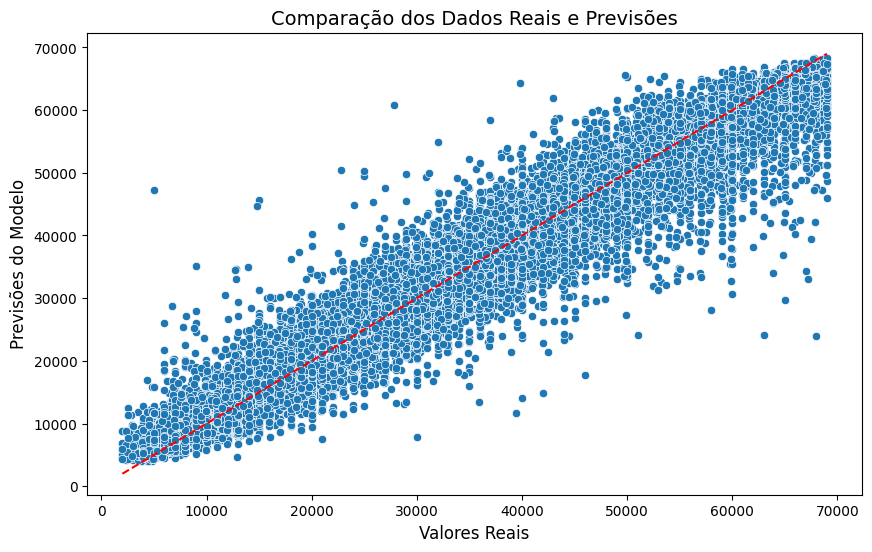

In [173]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.title('Comparação dos Dados Reais e Previsões', fontsize=14)
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Previsões do Modelo', fontsize=12)
plt.show()

A **linha vermelha tracejada** indica um cenário onde os valores reais são iguais às previsões.<br>

Os **pontos azuis** representam as previsões, portanto se os pontos se dispersarem muito da reta, indica que as previsões estão distantes dos valores reais. Pontos próximos à reta indicam previsões corretas.

### MAE, MSE e RMSE

In [174]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.3f}".format(mae))

MAE: 2280.655


In [175]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))

MSE: 10885344.303
RMSE: 3299.295


Para o Random Forest, o melhor **MAE** atingido foi de **2280.655**, o que significa na prática, que o modelo pode errar a previsão do **price** 2280.655 para cima ou para baixo. Se considerados valores altos de **price** como de 20.000 para cima, a métrica não é tão ruim, porém, se considerados valores mais baixos, como abaixos de 10.000, o modelo pode um pouco mais.

O melhor **RSME** foi de **3299.295** indicando que, em média, o erro é maior do que o sugerido pelo MAE. Com o **RMSE** é possível entender que não podemos levar em conta somente o **MAE**, e que podem ocorrer previsões que terão erros maiores, dentro desse intervalo evidenciado.

## LightGBM

O LightGBM é uma biblioteca que é baseada no algoritmo de **Gradient Boosting**, muito utilizada devido à sua eficiência, alta velocidade e alta performance em **grandes conjuntos de dados**.

O Gradient Boosting é uma técnica dentro do **Ensemble Learning**, uma variação de Boosting. Ele combina modelos fracos (geralmente árvores de decisão) de forma sequencial, ajustando cada novo modelo para reduzir o gradiente da função de perda (ou seja, o erro residual).

### Treinando o LightGBM com os melhores parâmetros

In [176]:
lgbm_tunned = LGBMRegressor(n_estimators=721, 
                            num_leaves=74, 
                            max_depth=9, 
                            min_data_in_leaf=10, 
                            learning_rate=0.2173123986539622)

In [177]:
lgbm_tunned.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 125532, number of used features: 7
[LightGBM] [Info] Start training from score 29085.242185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/home/matsa/miniconda3/envs/project2.1/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(learning_rate=0.2173123986539622, max_depth=9,
              min_data_in_leaf=10, n_estimators=721, num_leaves=74)

In [178]:
y_pred = lgbm_tunned.predict(X_test)
y_pred

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


array([21610.20688715, 15475.49866723, 16246.94885537, ...,
       17362.24591035, 46995.23960424, 14749.38453496], shape=(53800,))

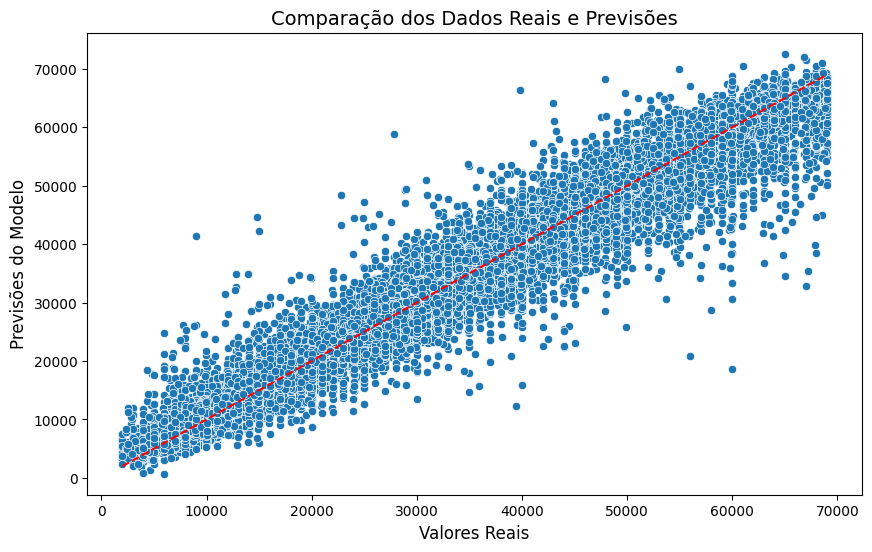

In [179]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.title('Comparação dos Dados Reais e Previsões', fontsize=14)
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Previsões do Modelo', fontsize=12)
plt.show()

A **linha vermelha tracejada** indica um cenário onde os valores reais são iguais às previsões.<br>

Os **pontos azuis** representam as previsões, portanto se os pontos se dispersarem muito da reta, indica que as previsões estão distantes dos valores reais. Pontos próximos à reta indicam previsões corretas.

### MAE, MSE, RMSE

In [180]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.3f}".format(mae))

MAE: 2123.999


In [181]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))

MSE: 9292059.718
RMSE: 3048.288


Para o LightGBM, o melhor **MAE** obtido foi de **2123.999**. Ele evidencia o mesmo, que em média, as previsões de **price** podem estar **2123.999** para cima, quanto para baixo.

O melhor **RSME** foi de **3048.288** indicando que, em média, o erro é maior do que o sugerido pelo MAE. Com o **RMSE** é possível entender que não podemos levar em conta somente o **MAE**, e que podem ocorrer previsões que terão erros maiores, dentro desse intervalo evidenciado pelo **RMSE**.

## Conclusão

Avaliando as métricas, é perceptível que o **LightGBM** teve um resultado **melhor** do que o **RandomForest**, tanto para **MAE**, quanto para **RMSE**, principalmente após o Tuning de hiperparâmetros. Porém, não necessariamente a performance do modelo é boa. Como dito anteriormente, para valores mais altos de **price** a diferença que pode existir na previsão de valores pode não ser tão impactante porém, para previsões de carros mais baratos, a diferença pode ser mais impactante.

# Quais as variáveis mais importantes para os modelos?

### RandomForest

In [184]:
rf_feature_importances = model_tunned.feature_importances_
rf_feature_names = model_tunned.feature_names_in_

for feature, importance in zip(rf_feature_names, rf_feature_importances):
    print(f'{feature}: {importance:.4f}')

model: 0.6630
year: 0.1080
mileage: 0.1088
engine: 0.0502
driver_reviews_num: 0.0375
mpg: 0.0174
manufacturer: 0.0151


In [185]:
rf_features_df = pd.DataFrame({
    "Feature": rf_feature_names,
    "Importance": rf_feature_importances
    })
rf_features_df

Feature  Importance
0               model    0.663034
1                year    0.107966
2             mileage    0.108793
3              engine    0.050239
4  driver_reviews_num    0.037476
5                 mpg    0.017381
6        manufacturer    0.015112

In [207]:
rf_features_df = rf_features_df.sort_values(by='Importance')

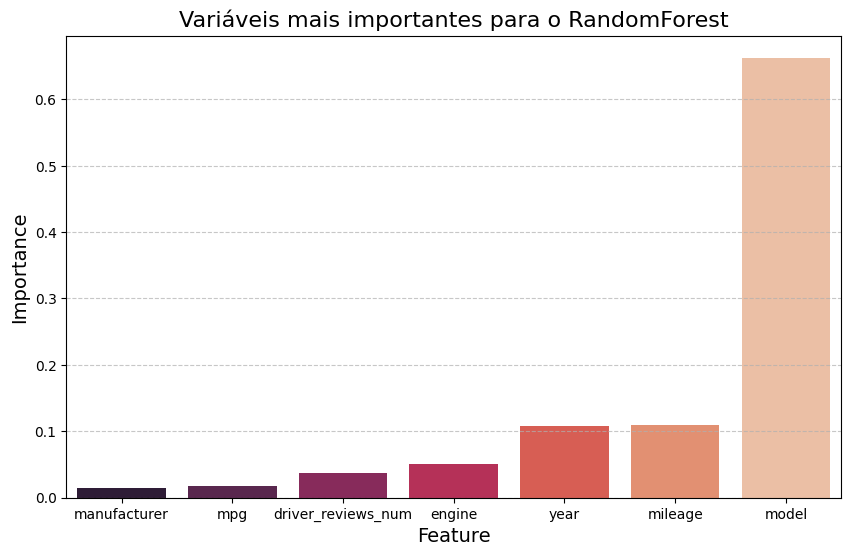

In [208]:
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_features_df, x='Feature', y='Importance', hue="Feature", palette="rocket")

plt.title("Variáveis mais importantes para o RandomForest", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### LightGBM

In [196]:
lgbm_feature_importances = lgbm_tunned.feature_importances_
lgbm_feature_names = lgbm_tunned.feature_name_

for feature, importance in zip(lgbm_feature_names, lgbm_feature_importances):
    print(f'{feature}: {importance:.4f}')

model: 10457.0000
year: 4226.0000
mileage: 13197.0000
engine: 7232.0000
driver_reviews_num: 7729.0000
mpg: 5301.0000
manufacturer: 4473.0000


In [204]:
lgbm_features_df = pd.DataFrame({
    "Feature": lgbm_feature_names,
    "Importance": lgbm_feature_importances
})
lgbm_features_df = lgbm_features_df.sort_values(by='Importance')

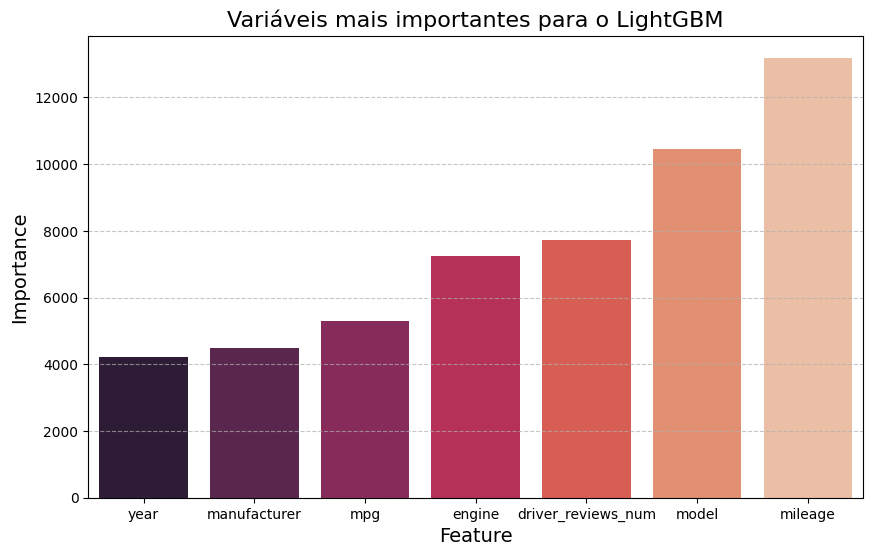

In [212]:
plt.figure(figsize=(10, 6))
sns.barplot(data=lgbm_features_df, x="Feature", y="Importance", hue="Feature", palette="rocket")

plt.title("Variáveis mais importantes para o LightGBM", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

É curioso verificarq que para o **Random Forest** a variável mais importante é a **model** e para o **LightGBM** é a **mileage**.